# Hotel Bookings Cancellation Prediction

## Objective

### To predict whether a booking will be cancelled or not based on historical data.

The incresed trend of cancellation from year to year has affected hotel not being able to accurately forecast occupancy within their revenue management, and the trend of cancellation also have causes hotel loss in opportunity cost (unsold room due to cancellation).

### Goals

1. The goal of this project is to find out the characteristic of customers who cancelled and finding a pattern in cancelled booking by doing an exploratory data analysis.

2. Building classification machine learning model to predict cancellation, that has accuracy score around 0.75 - 0.9

## Loading required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sidetable as stb
import warnings 
pd.set_option('display.max_columns', None)

import datetime as dt
warnings.filterwarnings('ignore')

## Loading the dataset

**The data set used here can be obtained from** *https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand*

This dataset contains hotel bookings from 2015 to 2017 from hotel in Region Algarve and Lisbon.

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

## Exploring the Dataset

In [3]:
print("The dimensions of data are:\n\n", df.shape, "\n", "*"*80)

print("\nThe columns of given data are:\n\n", df.columns, "\n", "*"*80)

print("\nThe data types of columns are:\n\n", df.dtypes, "\n", "*"*80)

The dimensions of data are:

 (119390, 32) 
 ********************************************************************************

The columns of given data are:

 Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object') 
 ********************************************************************************

The data types of columns are:

 hotel

In [4]:
print("Checking if any column has null values or not:\n\n")
df.info()

Checking if any column has null values or not:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                       

In [5]:
df['is_canceled'].value_counts(normalize =True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

The data is not imbalance so for the accuracy score will be considered as evaluation matrix score 

In [6]:
df['reservation_status'].value_counts()


Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

The **reservation status** column will need to be dropped for the machine learning since it has canceled status 
that will somehow leak the information to the model regarding latest status of a booking and will make the model bias
and won't be useful for predicting for cancelllation since the status only happened after the booking was cancelled or
after the customer checked out from the hotel.

In [7]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

There's an adr that's negative, we will do a deeper analysis on this because it's impossible to have a neagtive daily rate as the hotel there's 0 adult in the data as well we will do a deeper analysis on this because is impossible to have a booking with 0 adult.

In [8]:
df.describe(include = 'O')

hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status reservation_status_date  
count        119390        119390             119390                  119390  
unique            3             4                  3                     926  
top      No Deposit     Transient          Check-Out              2015-10-21  
freq         104641         89613              75166                    1461

Almost half of the booking were made from portugal. In this case **City hotel** is more favored (in Lisbon) compared to **Resort hotel** (algarve region).

There is a discrepancy of reserved room type and assigned room type. Hotel might have room that's not sold to the public. 

No deposit here might have a reason why cancellation is high (since customer will not have anything to lose in this no deposit case). 

Most popular room is room type A (we need to check it with the ADR which room type has the average daily rate and what it has to do with the popularity )


### Dataset Explanation

In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
col_detail = ["df (H1 = Resort df or H2 = City df).", 
              "Value indicating if the booking was canceled (1) or not (0).",
              "Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.",
              "Year of arrival date.",
              "Month of arrival date.",
              "Week number of year for arrival date.",
              "Day of arrival date.",
              "Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the df.",
              "Number of week nights (Monday to Friday) the guest stayed or booked to stay at the df.",
              "Number of adults.",
              "Number of children.",
              "Number of babies.",
              "Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner).",
              "Country of origin. Categories are represented in the ISO 3155–3:2013 format.",
              "Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.",
              "Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.",
              "Value indicating if the booking name was from a repeated guest (1) or not (0).",
              "Number of previous bookings that were cancelled by the customer prior to the current booking.",
              "Number of previous bookings not cancelled by the customer prior to the current booking.",
              "Code of room type reserved. Code is presented instead of designation for anonymity reasons.",
              "Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to df operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.",
              "Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.",
              "Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.",
              "ID of the travel agency that made the booking.",
              "ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.",
              "Number of days the booking was in the waiting list before it was confirmed to the customer.",
              "Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.",
              "Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.",
              "Number of car parking spaces required by the customer.",
              "Number of special requests made by the customer (e.g. twin bed or high floor).",
              "Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the df of the reason why.",
              "Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the df."]

df_descr = []
j = 0
for name in df.columns:
    df_descr.append(
      [
       name,
       df[name].dtypes,
       df[name].isnull().sum(),
       round(df[name].isnull().sum()/len(df)*100, 2),
       df[name].nunique(),
       df[name].unique(),
       col_detail[j]
       ]
       )
    j += 1

df_columns_desc = pd.DataFrame(df_descr, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique','Description'])
print(f"Total column of this data set is: {len(df.columns)} columns.")

Total column of this data set is: 32 columns.


In [11]:
df_columns_desc.head()

# based on the dataset explanation row that doesn't have any agent value means the booking is made without made agent (personal)

Column   Dtype  Null  Null (%)  nUnique  \
0               hotel  object     0       0.0        2   
1         is_canceled   int64     0       0.0        2   
2           lead_time   int64     0       0.0      479   
3   arrival_date_year   int64     0       0.0        3   
4  arrival_date_month  object     0       0.0       12   

                                              Unique  \
0                         [Resort Hotel, City Hotel]   
1                                             [0, 1]   
2  [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...   
3                                 [2015, 2016, 2017]   
4  [July, August, September, October, November, D...   

                                         Description  
0               df (H1 = Resort df or H2 = City df).  
1  Value indicating if the booking was canceled (...  
2  Number of days that elapsed between the enteri...  
3                              Year of arrival date.  
4                             Month of arrival date.

## Dataset Cleaning, Preparation and outliers Handling


### Cleaning

In [12]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

There are some columns with null value in the data frame we will need to imputing, and filling some random value and there's huge amount of missing value in the company column this might need to be drop, but we will discover it later on.


In [13]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [14]:
# filliing in the children missing value columns
# since the children mean and median and mode are 0 we will fill it with 0
# we will fill it with mode since in some case median or mean of a value is a float and you can't have a float value children
df['children'] = df['children'].fillna(0)


### imputing the country columns 
# the country column we will fill it with the most frequent value of the column
df['country'] = df['country'].fillna(df['country'].value_counts().index[0])

## since there are 334 of unique value in the column agent and imputing it would be a reckless move 
# and in the description mentioned that many nan value in the agent column is booking that'made from individual 
# so we will drop the column instead and we will drop the company column since it has more than 90% of null value 

df =df.drop(columns = ['agent', 'company'])
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Since the there is no null value anymore in the data now i will check the outliers

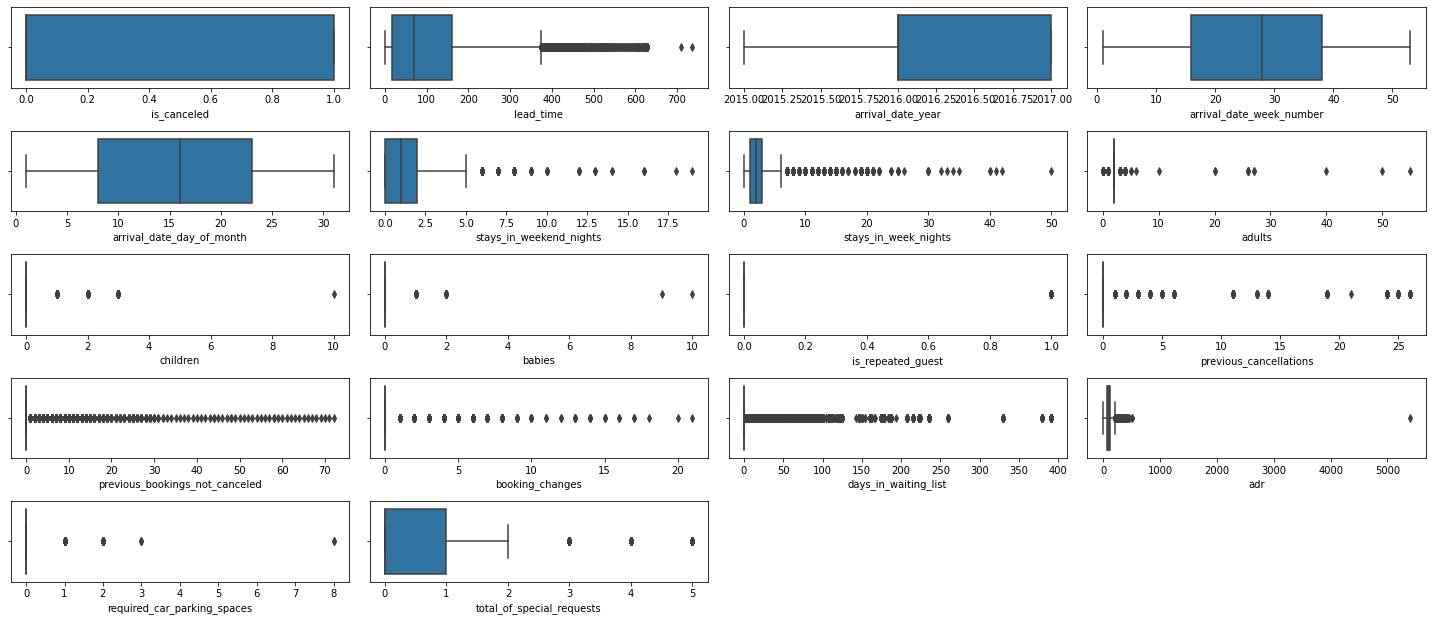

In [15]:
plt.figure(figsize = (20, 10))
x = 1 

for column in df.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(df[column])
    x+=1
    
plt.tight_layout()

There are many outliers in many of the columns.

We'll handle the outliers by binning the columns that has outliers in it and from the box plot there are columns that has a random value like 0 number of adults and negative amount of adr.

There's one value of adr that's above 5000 and there's only 1 data point since it so random we will drop that one outliers in
the adr column.

Since this data comes from both region and knowing the avg ADR is less than 5000 we will be dropping the row that has more than
5000 euro ADR


### Handling Adult Abnormal Value and ADR Abnormal Value

In [16]:
# Adult Abnormal Value
df.drop(labels = df[df['adults'] == 0].index, axis = 0, inplace = True)

# ADR Abnormal Value
df = df.drop(df[df.adr < 0].index)
df = df.drop(df[df.adr > 5000].index)

## Preparation 


### Arrival  and Total Stay Columns 


In [17]:
## getting booking Arrival date as Date time object 
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)
df['arrival_date'] = pd.to_datetime(df['arrival_date'])


## getting arrival month 
df['arrival_month'] = df['arrival_date'].dt.month


### getting arrival day
df['arrival_day'] = df['arrival_date'].dt.day_name()


### getting month year
df['month_year'] = pd.to_datetime(df['arrival_date']).dt.to_period('M')


### getting the total stays column by adding the weekday stays and the weekend stays 
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  days_in_waiting_list  \
0                  C                3   No Deposit                     0   
1                  C                4   No Deposit                     0   
2                  C                0   No Deposit                     0   
3                  A                0   No Deposit                     0   
4                  A                0   No Deposit                     0   

  customer_type   adr  required_car_parking_spaces  total_of_special_requests  \
0     Transient   0.0                            0                          0   
1     Transient   0.0                            0                          0   
2     Transient  75.0                            0                          0   
3     Transient  75.0                            0                          0   
4     Transient  98.0                            0                          1   

  reservation_status reservation_status_date arrival_date  arrival_month  \
0          Check-Out              2015-07-01   2015-07-01              7   
1          Check-Out              2015-07-01   2015-07-01              7   
2          Check-Out              2015-07-02   2015-07-01              7   
3          Check-Out              2015-07-02   2015-07-01              7   
4          Check-Out              2015-07-03   2015-07-01              7   

  arrival_day month_year  total_stays  
0   Wednesday    2015-07            0  
1   Wednesday    2015-07            0  
2   Wednesday    2015-07            1  
3   Wednesday    2015-07            1  
4   Wednesday    2015-07            2

In [18]:
df[df['total_stays'] == 0]

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
167     Resort Hotel            0        111               2015   
168     Resort Hotel            0          0               2015   
196     Resort Hotel            0          8               2015   
...              ...          ...        ...                ...   
115483    City Hotel            0         15               2017   
117701    City Hotel            0          0               2017   
118029    City Hotel            0          0               2017   
118631    City Hotel            0         78               2017   
118963    City Hotel            0          1               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
167                  July                        28   
168                  July                        28   
196                  July                        28   
...                   ...                       ...   
115483               July                        27   
117701             August                        32   
118029             August                        33   
118631             August                        34   
118963             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
167                             6                        0   
168                             6                        0   
196                             7                        0   
...                           ...                      ...   
115483                          6                        0   
117701                          8                        0   
118029                         14                        0   
118631                         23                        0   
118963                         27                        0   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
167                        0       2       0.0       0   BB     PRT   
168                        0       1       0.0       0   BB     PRT   
196                        0       2       0.0       0   BB     PRT   
...                      ...     ...       ...     ...  ...     ...   
115483                     0       1       0.0       0   SC     FRA   
117701                     0       2       0.0       0   BB     PRT   
118029                     0       2       0.0       0   BB     PRT   
118631                     0       1       0.0       0   BB     PRT   
118963                     0       2       0.0       0   BB     PRT   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
167         Online TA                TA/TO                  0   
168            Direct               Direct                  0   
196            Direct               Direct                  0   
...               ...                  ...                ...   
115483         Direct               Direct                  0   
117701  Offline TA/TO                TA/TO                  1   
118029         Direct               Direct                  1   
118631  Offline TA/TO                TA/TO                  0   
118963         Direct               Direct                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

There is a little randomness of the data as well since you won't be able to make a booking at the arrival date and checkout on 
the same day.

Many OTA (booking.com, traveloka won't allow you to do this however hilton hotel allow you to do this )
So we will keep the data instead of dropping it 

### Guest,  Kids & and Children 


We want to see the total guest of the booking by combining the value of adults children and babies and adding the kids in the booking by combiing the children and the babies, because majority of the bookings sites there's no babies option as well

In [19]:
# total guest of the hotel booking by adding the babies children and babies
df['guests'] = df['adults'] + df['children'] + df['babies']
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  days_in_waiting_list  \
0                  C                3   No Deposit                     0   
1                  C                4   No Deposit                     0   
2                  C                0   No Deposit                     0   
3                  A                0   No Deposit                     0   
4                  A                0   No Deposit                     0   

  customer_type   adr  required_car_parking_spaces  total_of_special_requests  \
0     Transient   0.0                            0                          0   
1     Transient   0.0                            0                          0   
2     Transient  75.0                            0                          0   
3     Transient  75.0                            0                          0   
4     Transient  98.0                            0                          1   

  reservation_status reservation_status_date arrival_date  arrival_month  \
0          Check-Out              2015-07-01   2015-07-01              7   
1          Check-Out              2015-07-01   2015-07-01              7   
2          Check-Out              2015-07-02   2015-07-01              7   
3          Check-Out              2015-07-02   2015-07-01              7   
4          Check-Out              2015-07-03   2015-07-01              7   

  arrival_day month_year  total_stays  guests  
0   Wednesday    2015-07            0     2.0  
1   Wednesday    2015-07            0     2.0  
2   Wednesday    2015-07            1     1.0  
3   Wednesday    2015-07            1     1.0  
4   Wednesday    2015-07            2     2.0

In [20]:
df['kids'] = df['children'] + df['babies']
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  days_in_waiting_list  \
0                  C                3   No Deposit                     0   
1                  C                4   No Deposit                     0   
2                  C                0   No Deposit                     0   
3                  A                0   No Deposit                     0   
4                  A                0   No Deposit                     0   

  customer_type   adr  required_car_parking_spaces  total_of_special_requests  \
0     Transient   0.0                            0                          0   
1     Transient   0.0                            0                          0   
2     Transient  75.0                            0                          0   
3     Transient  75.0                            0                          0   
4     Transient  98.0                            0                          1   

  reservation_status reservation_status_date arrival_date  arrival_month  \
0          Check-Out              2015-07-01   2015-07-01              7   
1          Check-Out              2015-07-01   2015-07-01              7   
2          Check-Out              2015-07-02   2015-07-01              7   
3          Check-Out              2015-07-02   2015-07-01              7   
4          Check-Out              2015-07-03   2015-07-01              7   

  arrival_day month_year  total_stays  guests  kids  
0   Wednesday    2015-07            0     2.0   0.0  
1   Wednesday    2015-07            0     2.0   0.0  
2   Wednesday    2015-07            1     1.0   0.0  
3   Wednesday    2015-07            1     1.0   0.0  
4   Wednesday    2015-07            2     2.0   0.0

### Meal Columnn

In [21]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

There's an undefined value from the dataset. However from the explanation from the source of the dataset that undefined meal package is same as SC (No Meal Package) and thus replacing the undefined to SC 

In [22]:
df['meal'] = df['meal'].str.replace('Undefined', 'SC')
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

Checking the columns description and all the columns boxplot before we moving on to the exploratory data analysis

In [23]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  118985.000000  118985.000000      118985.000000   
mean        0.370753     104.070353        2016.156356   
std         0.483008     106.891161           0.707743   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             118985.000000              118985.000000   
mean                  27.164407                  15.796781   
std                   13.598771                   8.781164   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            118985.000000         118985.000000  118985.000000   
mean                  0.926932              2.499029       1.862689   
std                   0.995235              1.897747       0.570064   
min                   0.000000              0.000000       1.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  118985.000000  118985.000000      118985.000000   
mean        0.100433       0.007951           0.031542   
std         0.390219       0.097474           0.174777   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           118985.000000                   118985.000000   
mean                 0.087339                        0.137328   
std                  0.845700                        1.499529   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes  days_in_waiting_list            adr  \
count    118985.000000         118985.000000  118985.000000   
mean          0.218507              2.325604     101.964460   
std           0.638068             17.614343      48.053329   
min           0.000000              0.000000       0.000000   
25%           0.000000              0.000000      69.500000   
50%           0.000000              0.000000      95.000000   
75%           0.000000              0.000000     126.000000   
max          18.000000            391.000000     510.000000   

       required_car_parking_spaces  total_of_special_requests  arrival_month  \
count                118985.000000              118985.000000  118985.000000   
mean                      0.062655                   0.570652       6.552381   
std                       0.245546                   0.792403       3.089348   
min                       0.000000                   0.000000       1.000000   
25%                       0.000000                   0.000000       4.000000   
50%                       0.000000                   0.000000       7.000000   
75%                       0.000000                

### Dropping Redundant Column

In [24]:
# since we have columns that that's have almost similar value like children, babies, now is combined into kids
# stays in weekend nights and stays in week nights now combined into total stays
# therefore dropping these columns 

df = df.drop(columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'babies', 'children'])

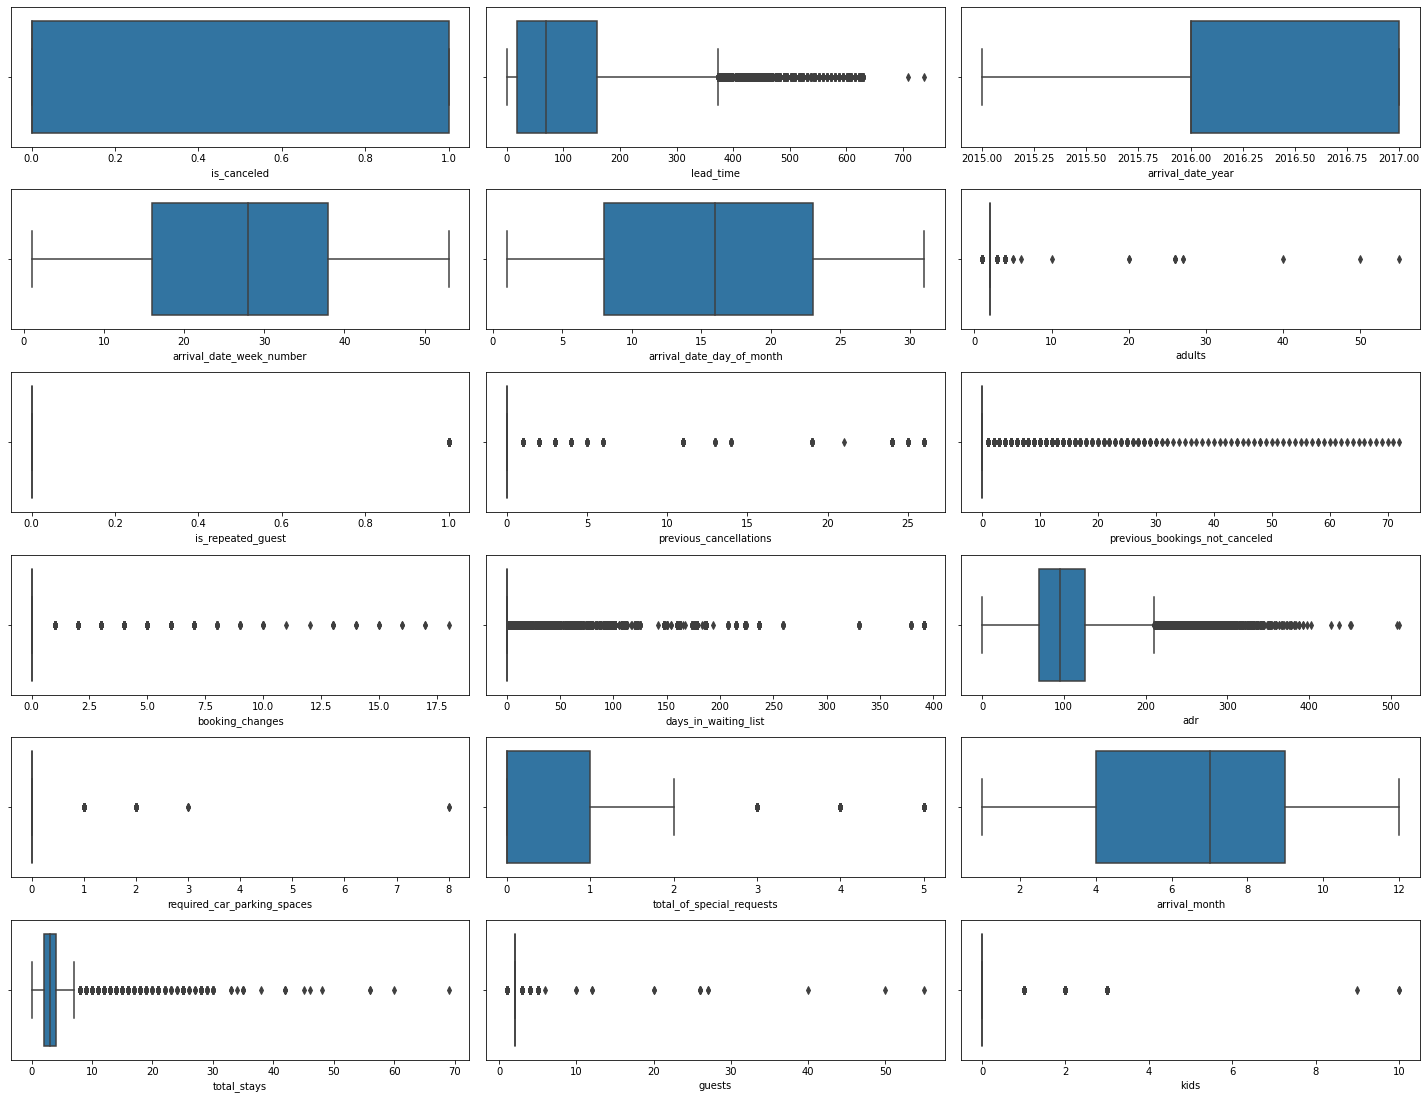

In [25]:
# Boxplots for Outliers
plt.figure(figsize = (20, 20))
x = 1 

for column in df.describe().columns:
    plt.subplot(8,3,x)
    sns.boxplot(df[column])
    x+=1
    
plt.tight_layout()

There are still many outliers in many of the columns.

we won't drop the outliers here as outliers could provide many useful information and will bin in and create new column and hopefully we will be able to extract some more information by doing that.

In [26]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  118985.000000  118985.000000      118985.000000   
mean        0.370753     104.070353        2016.156356   
std         0.483008     106.891161           0.707743   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month         adults  \
count             118985.000000              118985.000000  118985.000000   
mean                  27.164407                  15.796781       1.862689   
std                   13.598771                   8.781164       0.570064   
min                    1.000000                   1.000000       1.000000   
25%                   16.000000                   8.000000       2.000000   
50%                   28.000000                  16.000000       2.000000   
75%                   38.000000                  23.000000       2.000000   
max                   53.000000                  31.000000      55.000000   

       is_repeated_guest  previous_cancellations  \
count      118985.000000           118985.000000   
mean            0.031542                0.087339   
std             0.174777                0.845700   
min             0.000000                0.000000   
25%             0.000000                0.000000   
50%             0.000000                0.000000   
75%             0.000000                0.000000   
max             1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
count                   118985.000000    118985.000000         118985.000000   
mean                         0.137328         0.218507              2.325604   
std                          1.499529         0.638068             17.614343   
min                          0.000000         0.000000              0.000000   
25%                          0.000000         0.000000              0.000000   
50%                          0.000000         0.000000              0.000000   
75%                          0.000000         0.000000              0.000000   
max                         72.000000        18.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  \
count  118985.000000                118985.000000              118985.000000   
mean      101.964460                     0.062655                   0.570652   
std        48.053329                     0.245546                   0.792403   
min         0.000000                     0.000000                   0.000000   
25%        69.500000                     0.000000                   0.000000   
50%        95.000000                     0.000000                   0.000000   
75%       126.000000                     0.000000                   1.000000   
max       510.000000                     8.000000                   5.000000   

       arrival_month    total_stays         guests           kids  
count  118985.000000  118985.000000  118985.000000  118985.000000  
mean        6.552381       3.425961       1.971072       0.108383  
std         3.089348       2.541649       0.719446       0.404480  
min         1.000000       0.000000       1.000000       0.000000  
25%         4.000000       2.000000       2.000000       0.000000  
50%         7.000000       3.000000       2.000000       0.000000  
75%         9.000000       4.000000       2.000000       0.000000  
max        12.000000      69.000000      55.000000      10.000000

In [27]:
df.describe(include = 'O').T

count unique         top    freq
hotel                    118985      2  City Hotel   78939
arrival_date_month       118985     12      August   13829
meal                     118985      4          BB   92018
country                  118985    177         PRT   48917
market_segment           118985      8   Online TA   56221
distribution_channel     118985      5       TA/TO   97559
reserved_room_type       118985      9           A   85861
assigned_room_type       118985     11           A   73982
deposit_type             118985      3  No Deposit  104237
customer_type            118985      4   Transient   89336
reservation_status       118985      3   Check-Out   74871
reservation_status_date  118985    926  2015-10-21    1460
arrival_day              118985      7      Friday   19556

Since the data has been cleaned it has no more missing value and some randomness in the data, we will export this data and do an exploratory data analysis towards the data by reloading the exported data so that this data can be reused.

In [28]:
df.to_csv('hotel_cleaned.csv' ,index= False)

## EDA (Exploratory Data Aanlysis)

Loading the cleaned data

In [29]:
df = pd.read_csv('hotel_cleaned.csv')

### Univariate Analysis

#### Hotel Type

In [30]:
df.stb.freq(['hotel'], cum_cols=False)

hotel  count    percent
0    City Hotel  78939  66.343657
1  Resort Hotel  40046  33.656343

There are more booking from the city hotel compared to the resort hotel We will see later on how this affect cancellation.

In [31]:
df.stb.freq(['is_canceled'], cum_cols = False)

is_canceled  count    percent
0            0  74871  62.924738
1            1  44114  37.075262

The cancellation rate is somehow similar to the industry standard around 37 % - 40 % in 
source :
https://www.emerchantpay.com/infographic-how-can-hotels-combat-rising-cancellation-rates/

This is the problem that hospitality industy is facing. There are almost 4 cancellation in every 10 bookings. 

This data is  almost balance, so later on for the machine learning process we won't need to do an imbalance handling.

#### Lead Time 


Since there're many unique values in the lead time, we'll group it into months before we do analysis on those. So hopefully we can see a trend from binning lead time into months.

In [32]:
lead_time_months = df['lead_time'] // 30
lead_time_months.value_counts() / len(df)
df['lead_time_month'] = df['lead_time'] // 30

In [33]:
df.stb.freq(['lead_time_month'], cum_cols = False)

lead_time_month  count    percent
0                 0  37879  31.835105
1                 1  17140  14.405177
2                 2  12697  10.671093
3                 3  10453   8.785141
4                 4   8046   6.762197
5                 5   7891   6.631928
6                 6   5699   4.789679
7                 7   4354   3.659285
8                 9   3441   2.891961
9                 8   3420   2.874312
10               10   2737   2.300290
11               11   1787   1.501870
12               12    977   0.821112
13               13    816   0.685801
14               15    566   0.475690
15               14    531   0.446275
16               20    145   0.121864
17               16    123   0.103374
18               17    122   0.102534
19               18     91   0.076480
20               19     68   0.057150
21               24      1   0.000840
22               23      1   0.000840

We can see that here majority of the booking were made during the same month as the planned arrival however there are some booking that's made a year or more ahead before the arrival and we will see how this longer period of lead time affecting cancellation rate 

#### Distribution Channel

In [34]:
df.stb.freq(['distribution_channel'], cum_cols= False)

distribution_channel  count    percent
0                TA/TO  97559  81.992688
1               Direct  14577  12.251124
2            Corporate   6651   5.589780
3                  GDS    193   0.162205
4            Undefined      5   0.004202

We can see from the table above that Travel Agent or Tour Operator is the biggest booking distribution channel 
compared to other channel while direct is the second most biggest distribution channel

We will treat the undefined values as TA / TO 

In [35]:
df['distribution_channel'] =  df['distribution_channel'].str.replace('Undefined', 'TA/TO')
df.stb.freq(['distribution_channel'], cum_cols= False)

distribution_channel  count    percent
0                TA/TO  97564  81.996890
1               Direct  14577  12.251124
2            Corporate   6651   5.589780
3                  GDS    193   0.162205

#### Market Segment

In [36]:
df.stb.freq(['market_segment'], cum_cols = False)

market_segment  count    percent
0      Online TA  56221  47.250494
1  Offline TA/TO  24178  20.320208
2         Groups  19790  16.632349
3         Direct  12553  10.550069
4      Corporate   5282   4.439215
5  Complementary    724   0.608480
6       Aviation    235   0.197504
7      Undefined      2   0.001681

The market segment is almost similar to the distribution channel. However we see that there are more categories in this column compared to the distribution channel. Travel agent (online and offline) market segment dominating the booking compared to other market segment.

there are a couple of undefined values as well. Replacing it with mode here in this case is 'Online TA'
this is because of imputing the random value with the most frequent value in the column.

In [37]:
df['market_segment'] = df['market_segment'].replace('Undefined', 'Online TA')
df.stb.freq(['market_segment'], cum_cols = False)

market_segment  count    percent
0      Online TA  56223  47.252175
1  Offline TA/TO  24178  20.320208
2         Groups  19790  16.632349
3         Direct  12553  10.550069
4      Corporate   5282   4.439215
5  Complementary    724   0.608480
6       Aviation    235   0.197504

#### Meal Type

In [38]:
df.stb.freq(['meal'], cum_cols=False)

meal  count    percent
0   BB  92018  77.335799
1   HB  14454  12.147750
2   SC  11715   9.845779
3   FB    798   0.670673

*Bed and Breakfast* is the most popular meal package compared to the rest of the meal package 
while *Full Board* is the least popular meal package compared to the rest of the meal package (included breakfast, lunch , dinner )

#### Country

In [39]:
df.stb.freq(['country'], cum_cols = False).head(10)

country  count    percent
0     PRT  48917  41.111905
1     GBR  12104  10.172711
2     FRA  10376   8.720427
3     ESP   8546   7.182418
4     DEU   7271   6.110854
5     ITA   3752   3.153339
6     IRL   3370   2.832290
7     BEL   2326   1.954868
8     BRA   2212   1.859058
9     NLD   2094   1.759886

Almost half of the booking is made from portugal(PRT) (this is kind of make sense since the both of the hotel is in portugal)

Since that there's so many unique values from all the countries where the booking comes from we will try to group it into continent or we will group it into booking from portugal and booking from outside portugal since both of the hotel are in portugal. It's kind of make sense to split the booking into international booking or local booking 

In [40]:
def country(row):
    if (row['country'] == 'PRT'):
        return 'Local'
    else :
        return 'International'
    
df['booking_location'] = df.apply(country, axis = 1)

df.stb.freq(['booking_location'], cum_cols=False)

booking_location  count    percent
0    International  70068  58.888095
1            Local  48917  41.111905

The goals of creating a new column here so later on we can see how booking location affecting cancellation

#### Reserved Room Type

In [41]:
df.stb.freq(['reserved_room_type'], cum_cols = False)

reserved_room_type  count    percent
0                  A  85861  72.161197
1                  D  19178  16.117998
2                  E   6518   5.478001
3                  F   2892   2.430558
4                  G   2091   1.757364
5                  C    931   0.782452
6                  B    907   0.762281
7                  H    601   0.505106
8                  L      6   0.005043

As from our df.describe(include = 'O') we saw that room A is the most popular room in the bookings 
we will figure out later why, our assumption for now is room A is the cheapest room in the booking 
compared to any other rooms.

#### Deposit Type

In [42]:
df.stb.freq(['deposit_type'], cum_cols = False)

deposit_type   count    percent
0   No Deposit  104237  87.605160
1   Non Refund   14586  12.258688
2   Refundable     162   0.136152

As we mentioned before that the *No deposit type* is the most popular compared to other deposit type in this booking in portugal. This might be the reason why the cancellation in the industry has been on a rise the flexibility that's given to the customer to book hotel without any deposit.

In [43]:
df.stb.freq(['is_repeated_guest'], cum_cols = False)

is_repeated_guest   count    percent
0                  0  115232  96.845821
1                  1    3753   3.154179

from this table above, there are only 3.1 % of repeated guest from this booking. This might be affecting the cancellation of the hotel from the low rate of loyal customers.

Since we will not solely looking into loyal customer but this is few reason why loyal customer are more profitable than
the old ones 
1. They already know your value.
2. They cost less to service.
3. They refer more business.
4. They will buy and pay more

source : http://www.converoinc.com/4-reasons-existing-customers-are-more-profitable-than-new-ones/

### Previous Cancellation

In [44]:
df.stb.freq(['previous_cancellations'], cum_cols = False)

previous_cancellations   count    percent
0                        0  112508  94.556457
1                        1    6046   5.081313
2                        2     114   0.095810
3                        3      65   0.054629
4                       24      48   0.040341
5                       11      35   0.029415
6                        4      31   0.026054
7                       26      26   0.021851
8                       25      25   0.021011
9                        6      22   0.018490
10                      19      19   0.015968
11                       5      19   0.015968
12                      14      14   0.011766
13                      13      12   0.010085
14                      21       1   0.000840

Almost 95% of the booking never been cancelled before in this data set. We will group this into booking that's never been cancelled or have been cancelled before 

In [45]:
def cancellation(row):
    if (row['previous_cancellations'] == 0):
        return 0
    else :
        return 1

df['is_previously_cancelled'] = df.apply(cancellation, axis = 1)
df.stb.freq(['is_previously_cancelled'], cum_cols = False)

is_previously_cancelled   count    percent
0                        0  112508  94.556457
1                        1    6477   5.443543

#### Booking Changes

In [46]:
df.stb.freq(['booking_changes'], cum_cols = False)

booking_changes   count    percent
0                 0  101066  84.940119
1                 1   12620  10.606379
2                 2    3773   3.170988
3                 3     910   0.764802
4                 4     367   0.308442
5                 5     114   0.095810
6                 6      61   0.051267
7                 7      28   0.023532
8                 8      14   0.011766
9                 9       8   0.006724
10               10       6   0.005043
11               13       5   0.004202
12               15       3   0.002521
13               14       3   0.002521
14               17       2   0.001681
15               16       2   0.001681
16               18       1   0.000840
17               12       1   0.000840
18               11       1   0.000840

Almost 85 % of the customers never change their booking. Since there are many values of this booking changes column, we will group it in to does the booking ever been changes or not.

In [47]:
def changes(row):
    if (row['booking_changes'] == 0):
        return 0
    else :
        return 1

df['is_booking_changes'] = df.apply(changes, axis = 1)
df.stb.freq(['is_booking_changes'], cum_cols = False)

is_booking_changes   count    percent
0                   0  101066  84.940119
1                   1   17919  15.059881

#### Special Request

In [48]:
df.stb.freq(['total_of_special_requests'], cum_cols = False)

total_of_special_requests  count    percent
0                          0  70131  58.941043
1                          1  33085  27.806026
2                          2  12911  10.850948
3                          3   2480   2.084296
4                          4    338   0.284069
5                          5     40   0.033618

More than half of the customers don't have any special request when they book. We will see later if special request has an effect on the cancellation.

#### Customer Type

In [49]:
df.stb.freq(['customer_type'], cum_cols = False)

customer_type  count    percent
0        Transient  89336  75.081733
1  Transient-Party  25005  21.015254
2         Contract   4071   3.421440
3            Group    573   0.481573

Majority of the booking  customer here are transient (individual booking /personal not related to company or anything ). We will see how this customer type affecting the cancellation rate as well 

### Arrival Date Month

In [50]:
df.stb.freq(['arrival_day'], cum_cols = False)

arrival_day  count    percent
0      Friday  19556  16.435685
1    Thursday  19187  16.125562
2      Monday  18127  15.234693
3    Saturday  18002  15.129638
4   Wednesday  16074  13.509266
5      Sunday  14090  11.841829
6     Tuesday  13949  11.723326

Booking for arrival of day on Friday and Thursday has the higest percentage among all the other day while Booking for the arrival day of Sunday and Tuesday has the lowest percentage.

We will try to see this  with the number of cancellation 

## Multivariate Analysis


Since our goal is to findout what leads into high cancellation by looking at the characteristic of the customer and the pattern of cancelled booking, the multivariate analysis will centered around that process.

### Multivariate Anlysis I

In [51]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  adults meal country  \
0                        27                          1       2   BB     PRT   
1                        27                          1       2   BB     PRT   
2                        27                          1       1   BB     GBR   
3                        27                          1       1   BB     GBR   
4                        27                          1       2   BB     GBR   

  market_segment distribution_channel  is_repeated_guest  \
0         Direct               Direct                  0   
1         Direct               Direct                  0   
2         Direct               Direct                  0   
3      Corporate            Corporate                  0   
4      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  days_in_waiting_list  \
0                  C                3   No Deposit                     0   
1                  C                4   No Deposit                     0   
2                  C                0   No Deposit                     0   
3                  A                0   No Deposit                     0   
4                  A                0   No Deposit                     0   

  customer_type   adr  required_car_parking_spaces  total_of_special_requests  \
0     Transient   0.0                            0                          0   
1     Transient   0.0                            0                          0   
2     Transient  75.0                            0                          0   
3     Transient  75.0                            0                          0   
4     Transient  98.0                            0                          1   

  reservation_status reservation_status_date arrival_date  arrival_month  \
0          Check-Out              2015-07-01   2015-07-01              7   
1          Check-Out              2015-07-01   2015-07-01              7   
2          Check-Out              2015-07-02   2015-07-01              7   
3          Check-Out              2015-07-02   2015-07-01              7   
4          Check-Out              2015-07-03   2015-07-01              7   

  arrival_day month_year  total_stays  guests  kids  lead_time_month  \
0   Wednesday    2015-07            0     2.0   0.0               11   
1   Wednesday    2015-07            0     2.0   0.0               24   
2   Wednesday    2015-07            1     1.0   0.0                0   
3   Wednesday    2015-07            1     1.0   0.0                0   
4   Wednesday    2015-07            2     2.0   0.0                0   

  booking_location  is_previously_cancelled  is_booking_changes  
0            Local                        0                   1  
1            Local                        0                   1  
2    International                        0                   0  
3    International                        0                   0  
4    International                        

#### Hotel Type and Cancellations

In [52]:
pd.crosstab(df['hotel'], df['is_canceled'], normalize = 'index')

is_canceled          0         1
hotel                           
City Hotel    0.582032  0.417968
Resort Hotel  0.722319  0.277681

In [53]:
df.stb.freq(['hotel'], cum_cols = False)

hotel  count    percent
0    City Hotel  78939  66.343657
1  Resort Hotel  40046  33.656343

*City hotel* booking are more likely to be cancelled compared to the *Resort Hotel* in this booking dataset. 
We'll make an assumption here that with the increase numbers of booking the increase the number of booking cancellation 
*(postively correlated)*

#### Lead time and cancellation

How does lead time affect cancellation does?

A longer lead time will result in higher chances of cancellation. For this analysis we have group the lead time into months ( assuming 1 month is 30 days) 

In [54]:
pd.crosstab(df['lead_time_month'], df['is_canceled'], normalize = 'index')

is_canceled             0         1
lead_time_month                    
0                0.817498  0.182502
1                0.636173  0.363827
2                0.602189  0.397811
3                0.558978  0.441022
4                0.563510  0.436490
5                0.538081  0.461919
6                0.551851  0.448149
7                0.531465  0.468535
8                0.448830  0.551170
9                0.360942  0.639058
10               0.306905  0.693095
11               0.293788  0.706212
12               0.421699  0.578301
13               0.375000  0.625000
14               0.273070  0.726930
15               0.351590  0.648410
16               0.170732  0.829268
17               0.188525  0.811475
18               0.252747  0.747253
19               0.000000  1.000000
20               0.000000  1.000000
23               1.000000  0.000000
24               1.000000  0.000000

Leadtime in general has a linear effect towards cancellation. It means in general that the longer lead time has a higher cancellation rate compared to the shorter one bookings that has more than 7 months lead time are more likely to be canceled compared to confirmed.

#### Arrival Date Year and Cancellation

In [55]:
pd.crosstab(df['arrival_date_year'], df['is_canceled'], normalize = 'index')

is_canceled               0         1
arrival_date_year                    
2015               0.629373  0.370627
2016               0.641004  0.358996
2017               0.612807  0.387193

The cancellation rate goes down about 1.2 % from in 2016. However the cancellation rate goes up 1.9 % in 2017 to 38.7 %. The cancellation rate are almost similar to industry standard reported in 2018 reported there are 40 % of cancellation of bookings.

source :
https://www.emerchantpay.com/infographic-how-can-hotels-combat-rising-cancellation-rates/

However both the 2015 and 2017 only have the half of the year so this result may not represent the actual
cancelation for both 2015 and 2017

#### Arrival Date Month and Cancellation

Here we want to see if there is any specific month that has higher cancellation compared to the rest of the month or month doesn't have any effect on cancellation

In [56]:
pd.crosstab(df['arrival_date_month'], df['is_canceled'], normalize = 'index').sort_values(1, ascending = False)

is_canceled                0         1
arrival_date_month                    
June                0.584959  0.415041
April               0.592114  0.407886
May                 0.603111  0.396889
September           0.608352  0.391648
October             0.618722  0.381278
August              0.622098  0.377902
July                0.625169  0.374831
December            0.649792  0.350208
February            0.665546  0.334454
March               0.678326  0.321674
November            0.687361  0.312639
January             0.694731  0.305269

There's definitely fluctuation in term of arrival month and cancellation with the highest cancellation month are in 
1. June (41.5 %)
2. April (40.8 %)
3. May (39. 6 %)

which are summer months.

According to :
https://www.timeanddate.com/holidays/portugal/2017,

Those 3 months combined to total of 18 days of holidays and observance in 2017
15 days in 2016 
14 days in 2015 

Also, june is a school holiday in portugal

source : https://www.expatica.com/pt/education/children-education/school-holidays-in-portugal-69027/#:~:text=Summer%20break%3A%20taken%20between%209,differ%20depending%20on%20age%20group.

That's might be the reason why on those month cancelation is higher compared to the other months 

#### Number of Adults, kids & Total guest Cancellation 

Is there any effect on the numbers of adult in the booking towards cancellation

In [57]:
pd.crosstab(df['adults'], df['is_canceled'], normalize = 'index').sort_values(1, ascending = False)

is_canceled         0         1
adults                         
5            0.000000  1.000000
6            0.000000  1.000000
10           0.000000  1.000000
20           0.000000  1.000000
26           0.000000  1.000000
27           0.000000  1.000000
40           0.000000  1.000000
50           0.000000  1.000000
55           0.000000  1.000000
2            0.606849  0.393151
3            0.653176  0.346824
1            0.710166  0.289834
4            0.741935  0.258065

We can see that booking that has more than 4 adults registered in a single booking is always been cancelled.

In [58]:
pd.crosstab(df['kids'], df['is_canceled'], normalize = 'index')

is_canceled         0         1
kids                           
0.0          0.627407  0.372593
1.0          0.691841  0.308159
2.0          0.587609  0.412391
3.0          0.731959  0.268041
9.0          1.000000  0.000000
10.0         0.500000  0.500000

It seems that the number of kids in the booking doesn't really have any correlation towards cancellation

In [59]:
pd.crosstab(df['guests'], df['is_canceled'], normalize = 'index')

is_canceled         0         1
guests                         
1.0          0.709660  0.290340
2.0          0.603013  0.396987
3.0          0.678180  0.321820
4.0          0.581064  0.418936
5.0          0.751825  0.248175
6.0          0.000000  1.000000
10.0         0.500000  0.500000
12.0         0.500000  0.500000
20.0         0.000000  1.000000
26.0         0.000000  1.000000
27.0         0.000000  1.000000
40.0         0.000000  1.000000
50.0         0.000000  1.000000
55.0         0.000000  1.000000

For guests columns, it's almost similar like the adults columns however there are confirmed booking 


#### Booking Meal Package and Cancellation 

In [60]:
pd.crosstab(df['meal'], df['is_canceled'], normalize = 'index')

is_canceled         0         1
meal                           
BB           0.625932  0.374068
FB           0.401003  0.598997
HB           0.655251  0.344749
SC           0.638754  0.361246

Out of all meal package, booking that's with *Full Board* meal (breakfast, lunch, dinner are more likely to cancel compared to )
booking with other meal package while the other meal package has cancellation around 34 - 37 % 

#### Booking Location and Cancellation


In [61]:
pd.crosstab(df['booking_location'], df['is_canceled'], normalize = 'index')

is_canceled              0         1
booking_location                    
International     0.763601  0.236399
Local             0.436801  0.563199

Booking that're made in Portugal are almost 2.5 X more likely to be cancelled compared to booking that're made outside portugal. We will do deeper analysis why booking in portugal are more likely to be canceled compared to the international booking 

#### Which Market Segment & Distribution Channel Are More Likely to Cancel

In [62]:
pd.crosstab(df['market_segment'], df['is_canceled'], normalize = 'index')

is_canceled            0         1
market_segment                    
Aviation        0.778723  0.221277
Complementary   0.878453  0.121547
Corporate       0.812382  0.187618
Direct          0.846491  0.153509
Groups          0.388883  0.611117
Offline TA/TO   0.656713  0.343287
Online TA       0.632499  0.367501

*Group* market segment has a higher cancel rate compared to it's confirmed rate. Next to it is *Travel agent (online) and offline* has almost a similar number in term of cancellation rate. The lowest cancellation rate is *Direct Booking* (we exclude complimentary since it's complimentary)

In [63]:
pd.crosstab(df['distribution_channel'], df['is_canceled'], normalize = 'index')

is_canceled                  0         1
distribution_channel                    
Corporate             0.779432  0.220568
Direct                0.825273  0.174727
GDS                   0.808290  0.191710
TA/TO                 0.589367  0.410633

Travel Agent / Tour Operators has the highest cancellation rate among all the distribution channel 
while direct has the lowest cancellation rate 

#### Booking Changes & Cancellation


In [64]:
pd.crosstab(df['is_booking_changes'], df['is_canceled'], normalize = 'index')

is_canceled                0         1
is_booking_changes                    
0                   0.591376  0.408624
1                   0.842848  0.157152

Booking that has changes are less likely to be cancelled compared to the booking that's never been changed(original booking)

#### Previosly Cancelled & Cancellation


In [65]:
pd.crosstab(df['is_previously_cancelled'], df['is_canceled'], normalize = 'index')

is_canceled                     0         1
is_previously_cancelled                    
0                        0.660682  0.339318
1                        0.083218  0.916782

Booking that's previously cancelled are 92% will be cancelled again. This tell us that booking that's been cancelled are more likely to be cancelled again.

insight: 
We could implement (prevention from this kind of booking) some of the Big OTA has this product that allow you to prevent
booking from guest that's more likely to cancel 

source: 
https://partner.booking.com/en-gb/help/guides/how-better-understand-prevent-and-reduce-your-cancellations

#### Deposit Type & Cancellation

Majority of the booking in this dataset has *No deposit* policy. This gave flexibilty to the customers to cancel with ease whenever based on their liking without having to deal with any loss, however there are implication from customers who cancel

In [66]:
pd.crosstab(df['deposit_type'], df['is_canceled'], normalize = 'index')

is_canceled          0         1
deposit_type                    
No Deposit    0.716176  0.283824
Non Refund    0.006376  0.993624
Refundable    0.777778  0.222222

As we can see that *Non Refundable* deposit has the highest cancellation rate among all deposit type. So the hotel somehow already protect themselves from losing out on revenue by implementing the *Non refund*
deposit 

We will look into this deeper why does Non Refund policy have the highest cancellation rate among all bookings ?


#### Total number Special Request and Cancellation

In [67]:
pd.crosstab(df['total_of_special_requests'], df['is_canceled'], normalize = 'index')

is_canceled                       0         1
total_of_special_requests                    
0                          0.522308  0.477692
1                          0.779810  0.220190
2                          0.779335  0.220665
3                          0.822177  0.177823
4                          0.893491  0.106509
5                          0.950000  0.050000

The numbers of special request has a negative correlation  with cancellation. We see that the higher the number of the total 
special request the lower the cancellation rate, means here that customers who booked and requested a lot of stuff are
more likely not to cancel compared to customer who did not have special requests. 

The assumption here is booking with more special request are likely customers who has a special needs from dietary restriction (vegan, vegetarian, etc) or special request for room type (smoking) and another requests.

#### Parking Spaces & Cancellation

In [68]:
pd.crosstab(df['required_car_parking_spaces'], df['is_canceled'], normalize='index')

is_canceled                         0         1
required_car_parking_spaces                    
0                            0.604635  0.395365
1                            1.000000  0.000000
2                            1.000000  0.000000
3                            1.000000  0.000000
8                            1.000000  0.000000

Here shows that customer who need a parking spot for their vehicle actually never cancelled their hotel booking. This could be a good insight for the hotel interm of marketing. The hotel could promote anything that makes people who vehicle life easier, eg(free valet, free charging for electric car, and free parking) since there're no cancellation for people who drives to the hotel attracting more of them is not a bad idea at all.

In [69]:
def parking(row):
    if (row['required_car_parking_spaces'] < 1):
        return 0
    else :
        return 1
    
df['parking_space'] = df.apply(parking, axis = 1)
df.stb.freq(['parking_space'], cum_cols = False)

parking_space   count    percent
0              0  111578  93.774846
1              1    7407   6.225154

We simplified into 2 segment booking that require parking space and booking that don't require a parking space. We see that only 6.2 percent of the booking that require parking space

### Multivariate Analysis II


We have looked at comparison at each independent variable to dependent variable, we want to compare multiple independet varibale to dedpendent variable or independet variable to another independet variable

#### Hotel type , lead time and cancellation

In [70]:
pd.crosstab(df['hotel'], df['is_canceled'], values = df['lead_time'], aggfunc = 'median')

is_canceled    0    1
hotel                
City Hotel    50  115
Resort Hotel  38  109

The median lead time of cancelled booking in both hotel are longer compared to confirmed booking. The median lead time for cancelled booking in both hotel are around 3 months while for confirmed booking are around 1 month. We use median here instead of mean because of there are outliers in this columns. 

#### Hotel Type, Cancellation and Median ADR

In [71]:
pd.crosstab(df['hotel'], df['is_canceled'], values = df['adr'], aggfunc = 'median')

is_canceled       0     1
hotel                    
City Hotel    100.0  99.9
Resort Hotel   72.0  84.0

The reason why median is used is because there are many outliers in the "ADR" column. For *City Hotel* we see that the median ADR for cancelled and confirmed booking is the same while for *Resort hotel* the median adr for cancelled booking is slightly higher compared to confirmed booking.

#### Hotel Type Meal, Cancellation

In [72]:
pd.crosstab([df['hotel'],df['meal']], df['is_canceled'], normalize = 'index')

is_canceled               0         1
hotel        meal                    
City Hotel   BB    0.571433  0.428567
             FB    0.204545  0.795455
             HB    0.619850  0.380150
             SC    0.623245  0.376755
Resort Hotel BB    0.738584  0.261416
             FB    0.412467  0.587533
             HB    0.683445  0.316555
             SC    0.769293  0.230707

*Resort hotel* has higher confirmed booking in any meal category, compared to *City hotel*, while *Full board* meal package seems to be the meal package with the highest cancellation rate in both hotel 

#### Market Segment and Deposit Type

From our analysis before we see that Group booking has the highest cancellation rate among all market segment, higher cancellation rate compared to it's confirmed rate might cause the hotel loss if group booking has no deposit policy.

Now we want to take a look deposit type for each market segment.

In [73]:
pd.crosstab(df['market_segment'], df['deposit_type'], normalize = 'index')

deposit_type    No Deposit  Non Refund  Refundable
market_segment                                    
Aviation          1.000000    0.000000    0.000000
Complementary     1.000000    0.000000    0.000000
Corporate         0.936009    0.063234    0.000757
Direct            0.998008    0.001514    0.000478
Groups            0.529965    0.463466    0.006569
Offline TA/TO     0.792828    0.207006    0.000165
Online TA         0.998684    0.000996    0.000320

We see that more that half of the group booking still made with no deposit. For future protection of the hotel (since group cancellation rate is at 61%, all group booking should be with( no refund) policy or refundable (with charges) deposit policy.

Online travel agent has the 2nd highest cancellation rate among all market segment, and we can see here almost all of the
booking that's made through online travel agent are with no deposit (deposit type)

Suggestion :
Online travel agent is one of the distribution channel / market segment, the hotel still have the full control in determining
what kind of deposit policy that want to be implemented in the online travel agency. In this case the channel manager should split up the deposit type for Online Travel Agent Market Segment.

#### Previous Cancellation and Deposit Type

From our analysis we see that 92 % of booking that has been canceled before will be cancelled again we want to see how's the deposit type of those bookings

In [74]:
pd.crosstab(df['is_previously_cancelled'], df['deposit_type'], normalize = 'index')

deposit_type             No Deposit  Non Refund  Refundable
is_previously_cancelled                                    
0                          0.901323    0.097238     0.00144
1                          0.437085    0.562915     0.00000

We see that for the customer that has cancelled before more than half of the booking are in non refund (deposit type). However there are still more than 43% no deposit (deposit type) for booking that's been canceled before.

As from our previous analysis that 92% of booking that's previously cancelled will be cancelled again, my suggestion here is that there should be only non refund booking or refundable booking ( with charges) deposit type for customer who had cancelled their previous booking.

#### Previous Cancellation and Market segment

We want to know where does all previous cancellation booking comes from!!


In [75]:
pd.crosstab(df['is_previously_cancelled'], df['market_segment'], normalize = 'index')

market_segment           Aviation  Complementary  Corporate    Direct  \
is_previously_cancelled                                                 
0                        0.002009       0.005848   0.041828  0.109921   
1                        0.001390       0.010190   0.088930  0.028717   

market_segment             Groups  Offline TA/TO  Online TA  
is_previously_cancelled                                      
0                        0.146141       0.200012    0.49424  
1                        0.516906       0.258607    0.09526

More than half of the booking that're previously cancelled are from *Group* booking 

### Why does Non Refund Deposit Type Are More Likely to Canceled Compared to Other Deposit Type

During our analysis we see that lead time have a somehow positive correlation with the cancellation the higher the lead time the more likely a guest will cancel. In this segment we want to see the median / the average lead time for each deposit type and how it might lead into cancellation rate for each deposit type 

In [76]:
pd.crosstab(df['deposit_type'], 'Median Lead Time', values = df['lead_time'], aggfunc = 'median')

col_0         Median Lead Time
deposit_type                  
No Deposit                  56
Non Refund                 183
Refundable                 169

This might be the reason why non refund has the highest cancellation because of the longer lead time. From our earlier analysis we see that the longer the lead time the higher the chances of cancellation happening. As we can see from the table that Non Refund Booking Has the highest median lead time. 

#### Does Non Refund Booking Get Cheaper ADR ?

One of the hospitality technique to sell a room with non refund policy and longer lead time is selling them for cheaper compared to no deposit policy, but you’re likely to make up the small price difference by getting more guaranteed bookings and higher overall revenue

In [77]:
pd.crosstab(df['deposit_type'], 'Median ADR', values = df['adr'], aggfunc = 'median')

col_0         Median ADR
deposit_type            
No Deposit         95.67
Non Refund         86.00
Refundable         66.00

Apparently our assumption is different compared to the real data as the median price for refundable  booking is the lowest compared to the other deposit type.

## Visualization

In [78]:
import plotly.express as px
import plotly.graph_objects as go

### Univariate


#### Booking Location

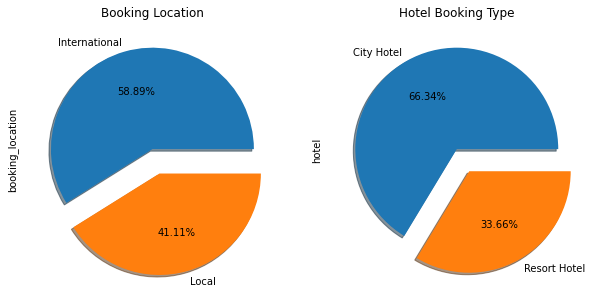

In [79]:
# wherer are all the the bookings coming from 

plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
df['booking_location'].value_counts().plot.pie(explode = [0, 0.25], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.title('Booking Location')

plt.subplot(1,2,2)
df['hotel'].value_counts().plot.pie(explode = [0, 0.25],
                                 autopct = '%1.2f%%',
                                 shadow = True)
plt.title('Hotel Booking Type')

plt.show()

We see that more than half of the booking were from outside of the Portugal while 41.11 % are from Portugal


#### Booking Market Segment & Distribution Channel

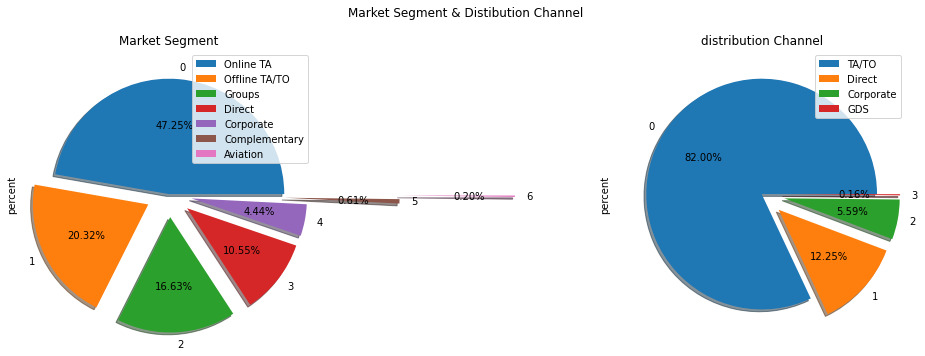

In [80]:
distribution_channel = df.stb.freq(['distribution_channel'], cum_cols = False)
market_segment = df.stb.freq(['market_segment'], cum_cols = False)
market_segment

plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
market_segment['percent'].plot.pie(explode = [0, 0.2, 0.2, 0.2, 0.2, 1, 2], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.legend(market_segment['market_segment'])
plt.title('Market Segment')

plt.subplot(1,2,2)
distribution_channel['percent'].plot.pie(explode = [0, 0.2, 0.2, 0.2], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.legend(distribution_channel['distribution_channel'])
plt.title('distribution Channel')

plt.suptitle('Market Segment & Distibution Channel')
plt.tight_layout()
plt.show()

#### Deposit Type

Text(0.5, 1.0, 'Deposit Type')

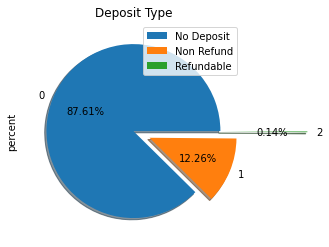

In [81]:
deposit_type = df.stb.freq(['deposit_type'],cum_cols = False)


deposit_type['percent'].plot.pie(explode = [0, 0.2, 1], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.legend(deposit_type['deposit_type'])
plt.title('Deposit Type')


#### The Distribution of DAR

In [82]:
fig = px.histogram(df, x="adr",
                  title = 'ADR Distribution'
                  )
fig.show()

# from the histogram below we can see that the highest frequency of adr is where adr is around 61.5 - 62.49

#### Arrival Date of Month

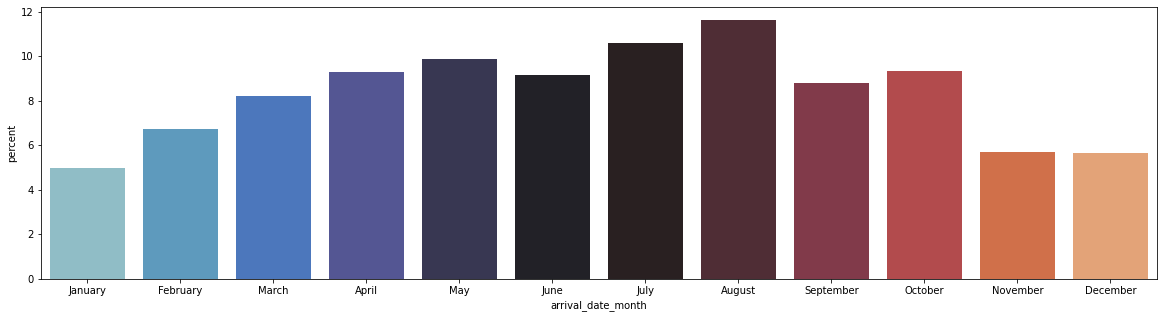

In [83]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

arrival = df.stb.freq(['arrival_date_month'], cum_cols = False)
# arrival['arrival_date_month'] = pd.Categorical(arrival['arrival_date_month'], categories=order, ordered=True)
arrival
plt.figure(figsize = (20, 5))
sns.barplot(x = 'arrival_date_month', y='percent', data = arrival, order = order, palette = 'icefire')
plt.show()

We see that percentage of the arrival that august has the highest total booking.

Why is that :
According to :
https://www.expatica.com/pt/education/children-education/school-holidays-in-portugal-69027/#:~:text=Summer%20break%3A%20taken%20between%209,differ%20depending%20on%20age%20group.

Summer holiday in Portugal will taken between 9 June to 12 September in 2021. We are assuming the summer holiday in 2015 - 2017 happen around the same day that might be the reason why booking for that arrival is higher  especially in august. 

However in this dataset we see that the month of august and july appear 3 times while the rest of the month appear
for only 2 times. This definitely have an effect on the number of percentage

#### Arrival Month Year and ADR

In [84]:
arrival_month_year = df.stb.freq(['month_year'],cum_cols = False).sort_values('month_year')
fig = px.bar(arrival_month_year, x = 'month_year', y = 'percent', text = 'percent')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

Ww see a booking pattern here that low season for hotel booking in Portugal happened during winter time 
(November, December, January). Percentage of booking happened during winter season are usually lower compared to booking in other months.
We will see later if this happened to both hotel or happened towards city / resort hotel 

We also see a spike in percentage number of booking during the spring to summer (march, april, may)
this might have somthing to do with Portugal easter break ( end of march to early april)
and the general summer break for the rest of the world

#### Seaborn version of the above plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '2015-07'),
  Text(1, 0, '2015-08'),
  Text(2, 0, '2015-09'),
  Text(3, 0, '2015-10'),
  Text(4, 0, '2015-11'),
  Text(5, 0, '2015-12'),
  Text(6, 0, '2016-01'),
  Text(7, 0, '2016-02'),
  Text(8, 0, '2016-03'),
  Text(9, 0, '2016-04'),
  Text(10, 0, '2016-05'),
  Text(11, 0, '2016-06'),
  Text(12, 0, '2016-07'),
  Text(13, 0, '2016-08'),
  Text(14, 0, '2016-09'),
  Text(15, 0, '2016-10'),
  Text(16, 0, '2016-11'),
  Text(17, 0, '2016-12'),
  Text(18, 0, '2017-01'),
  Text(19, 0, '2017-02'),
  Text(20, 0, '2017-03'),
  Text(21, 0, '2017-04'),
  Text(22, 0, '2017-05'),
  Text(23, 0, '2017-06'),
  Text(24, 0, '2017-07'),
  Text(25, 0, '2017-08')])

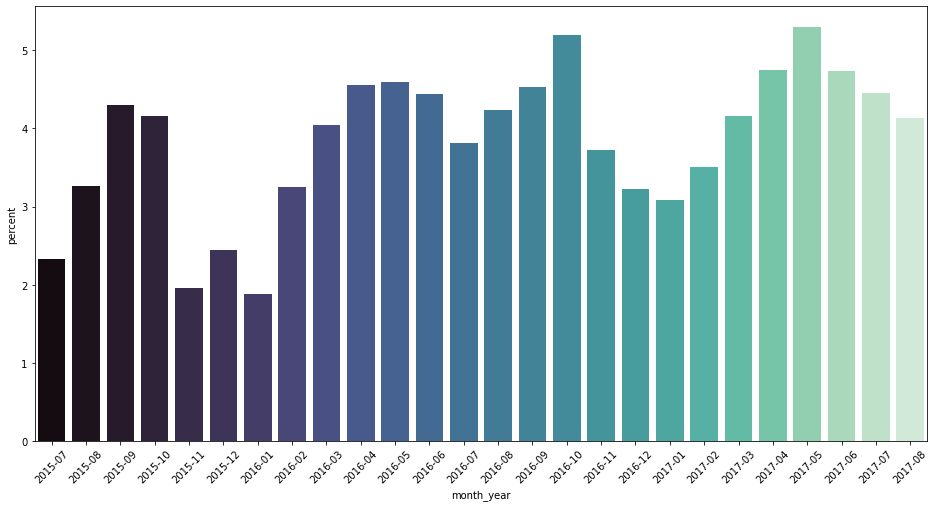

In [85]:
plt.figure(figsize = (16, 8))
sns.barplot(data = arrival_month_year, x = 'month_year', y = 'percent', palette = 'mako')
plt.xticks(rotation = 45)

In [86]:
month_year_adr =  pd.crosstab(df['month_year'], 'Median Price', values = df['adr'], aggfunc = 'median')

fig = px.line(month_year_adr, x = month_year_adr.index, y ='Median Price', title = 'Median ADR')
fig.show()

The median ADR in general follow the number of the booking as we can see during the low period (november, december, january). The median ADR will goes down as well while during the month where the hotel is busy (summer)(may, june, july) the median ADR will tend to goes up as well.

#### Arrival Month Year For Each Hotel & ADR

we want to compare how does number of booking difference in two hotels from month to month

In [87]:
hotel_month_year =  pd.crosstab(df['month_year'], df['hotel'], normalize = 'columns')

fig = go.Figure(data=[
    go.Bar(name='City Hotel', x=hotel_month_year.index, y=hotel_month_year['City Hotel']),
    go.Bar(name='Resort Hotel', x=hotel_month_year.index, y=hotel_month_year['Resort Hotel'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()


Observe a different trend for 2 different hotels:

Resort hotel in general out perfrom City Hotel during winter period (November, December ,January). Our assumption is resort hotels generally offer more attraction compared to the City hotel while City Hotel offered the possibility of exploring around hence it's located around the city. Since the winter weather is not the nicest weather to go around, maybe that's why resort hotel is more preferable during the winter.

The another reason could be that City hotel and Resort hotel here are located in 2 different region: Resort hotel located in Algarve while City hotel located in Lisbon 

According to :
https://www.algarveuncovered.com/out-of-season/, in Algrave region the weather is somewhere (17 - 20) Celcius during the winter
which still kind of warm while in Lisbon the weather tend to get cooler between 8 - 15 C in the winter this weather might be the reason the booking during the winter for City hotel is way less compared to the booking during the summer / warmer months. 

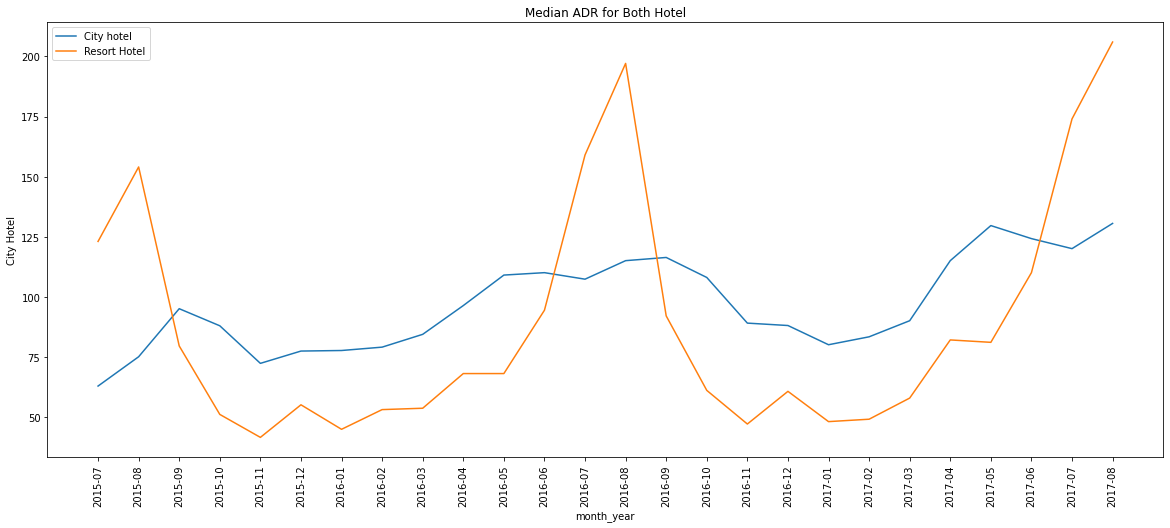

In [88]:
hotel_month_year_adr =  pd.crosstab(df['month_year'], df['hotel'], values = df['adr'], aggfunc = 'median')

plt.figure(figsize = (20, 8))

sns.lineplot(hotel_month_year_adr.index, hotel_month_year_adr['City Hotel'])
sns.lineplot(hotel_month_year_adr.index, hotel_month_year_adr['Resort Hotel'])
plt.xticks(rotation = 90)
plt.legend(['City hotel', 'Resort Hotel'])
plt.title('Median ADR for Both Hotel')
plt.show()

From the graph we conclude that for Resort hotel price is more fluctuative compared to the City hotel. Resort hotel price usually spike during the summer time May to June while the price for Resort hotel generally drop from August to november. However there's a small increase during december (this might due to christmas)

The median price for both hotels are getting more and more expensive per year

### Number of Cancellation Towards The Number of Booking 


based on many journal and article that number of cancellation rise as the number of booking increases, we want to how is this affecting portugal hotel bookings 

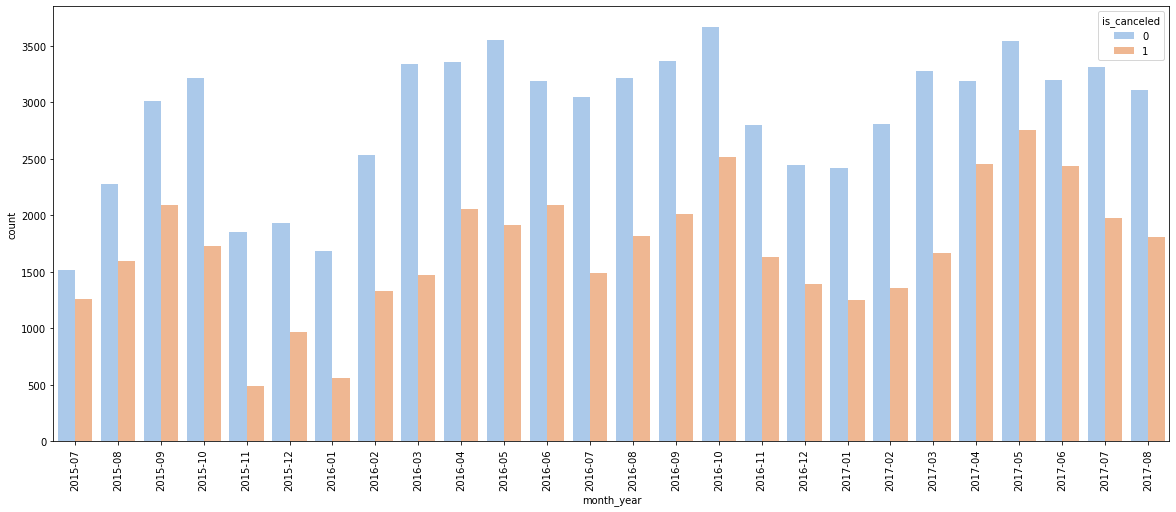

In [89]:
plt.figure(figsize = (20, 8))
sns.countplot(df['month_year'], hue = df['is_canceled'], palette = 'pastel')
plt.xticks(rotation = 90)

plt.show()

Observe from the chart that the number of cancellation generally goes up as the number of booking goes up. However it doesn't seem number of cancellation has a linear effect towards number of bookings. We can see that there are certain month that has a higher percentage of confirmed booking compared to other months.

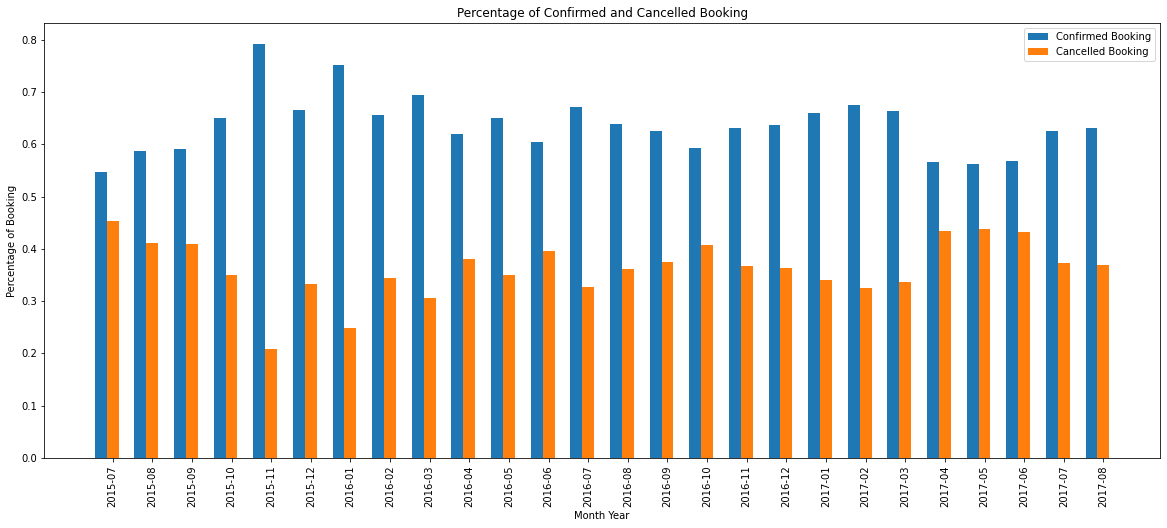

In [90]:
step = np.arange(0,26)
month_year_cancellation=pd.crosstab(df['month_year'], df['is_canceled'], normalize = 'index')

fig, ax = plt.subplots(figsize = (20, 8))


ax.bar(step - 0.3, month_year_cancellation[0], width = 0.3)
ax.bar(step, month_year_cancellation[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticklabels(month_year_cancellation.index, rotation = 90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('Month Year')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()



look at the plot and see the month of November 2015 and January 2016, majority of the month has a cancellation rate around
30 to 40 percent however these two months are the only months with cancellation rate below 30 %. 

Is it just because the randomness or is there any explanation behind it 
hypothesis testing needed for this ??? 

#### ADR effect on the number of cancellation

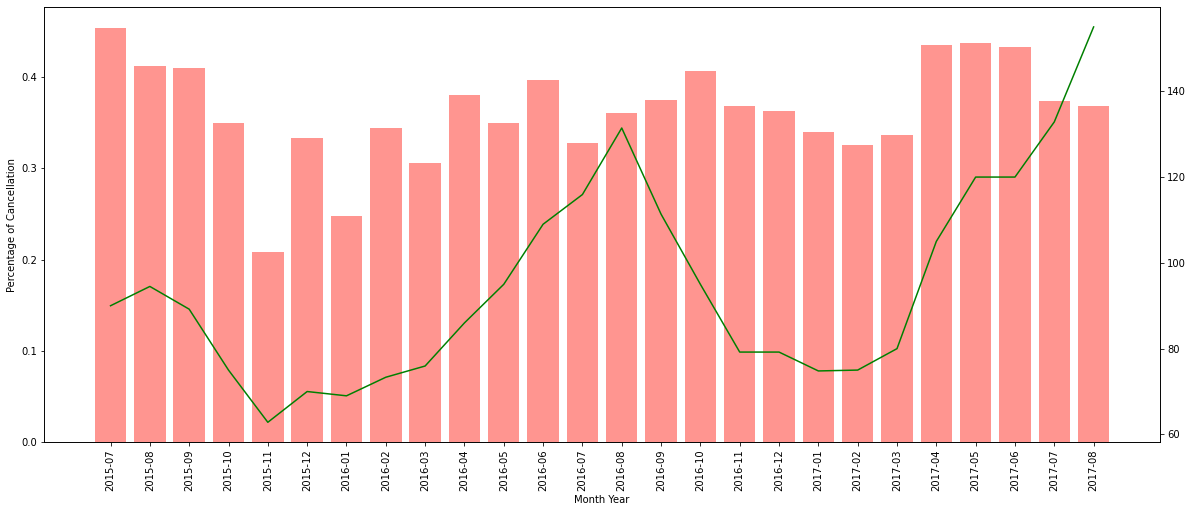

In [91]:
fig, ax1 = plt.subplots(figsize = (20, 8))
ax2 = ax1.twinx()

ax1.bar(step, month_year_cancellation[1], color = '#ff6961', alpha = 0.7)
ax1.set_xlabel('Month Year')
ax1.set_ylabel('Percentage of Cancellation')
ax2.plot(month_year_adr.index, month_year_adr['Median Price'], color = '#008000')
ax1.set_xticks(step)
ax1.set_xticklabels(month_year_cancellation.index, rotation = 90)

plt.show()

As we conclude that cancellation tend to goes up as the number of booking goes up as the number of booking goes up the ADR will goes up as well so months with higher cancellation has higher ADR compared to months with low cancellation 

#### Leadtime and cancellation

In [92]:
lead_time_canceled =  pd.crosstab(df['lead_time_month'], df['is_canceled'], normalize = 'index')
lead_time_canceled_deposit = pd.crosstab(df['lead_time_month'], df['deposit_type'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=lead_time_canceled.index, y=lead_time_canceled[0]),
    go.Bar(name='Cancelled Booking', x=lead_time_canceled.index, y=lead_time_canceled[1],marker_color = 'crimson')
])
# Change the bar mode
fig.update_layout(barmode='group', title = 'Percentage of Confirmed Booking and Cancelled Booking per Lead Time Month',
                 yaxis=dict(
                 title='Percentage',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Lead Time Month',
                 titlefont_size=16,
                 tickfont_size=14,))
fig.show()

Observe from the graph, booking that has lead time more than 7 months are more likely to be canceled than to be confirmed.
In general the longer the lead time the higher the chances the booking to be cancelled compared to be confirmed 

In [93]:
pd.crosstab(df['lead_time_month'], df['is_canceled']).sort_index(ascending = True)[22:]

is_canceled      0  1
lead_time_month      
24               1  0

We see that the 100 % of confirmed booking in month of 23 / 24 is only a sample of 1 single booking 


#### Median Lead Time For Canceled and Confirmed Booking Each Month

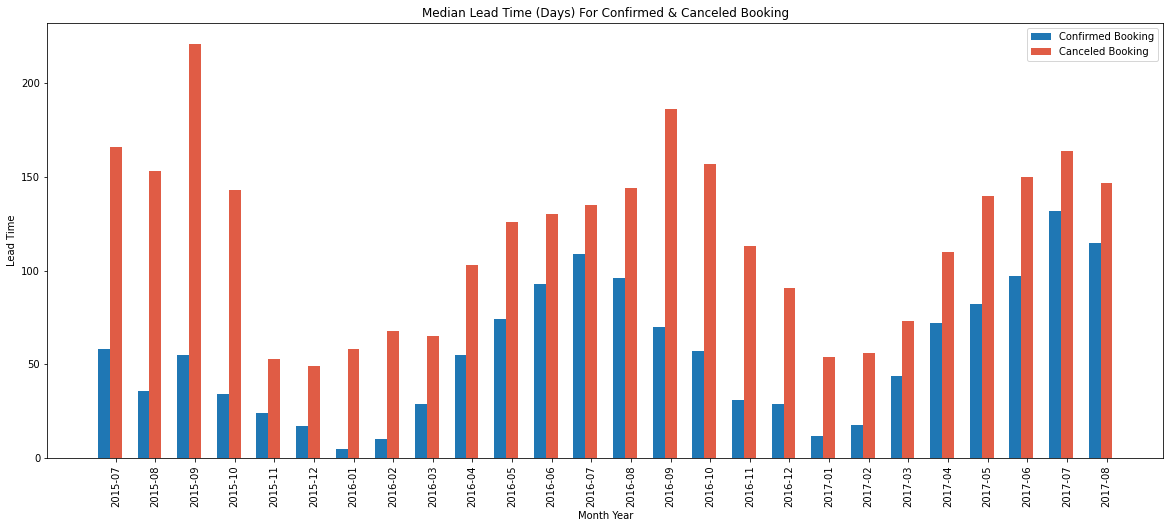

In [94]:
lead_time_booking =  pd.crosstab(df['month_year'], df['is_canceled'], values = df['lead_time'], aggfunc = 'median')

step2 = np.arange(0,26)

fig, ax = plt.subplots(figsize = (20, 8))

ax.bar(step2 - 0.3, lead_time_booking[0], width = 0.3)
ax.bar(step2, lead_time_booking[1], width = 0.3, color = '#E05C45')
ax.set_xticks(step2)
ax.set_xticklabels(lead_time_booking.index, rotation = 90)
plt.xlabel('Month Year')
plt.ylabel('Lead Time')
plt.title('Median Lead Time (Days) For Confirmed & Canceled Booking')
plt.legend(['Confirmed Booking', 'Canceled Booking'])
plt.show()

We definitely see a pattern here for each month 

December 2015 has the lowest median lead time for canceled and confirmed booking. 
For booking with arrival date in the spring & summer (march - august) in general have a longer median lead time compared to
booking for fall - winter season (September - December).
For each year September tend to have the highest median lead time for canceled booking (we couldn't find any specific information why september in general has the highest lead time for canceled booking for the
past 2 years).

Lead time for canceled booking and confirmed booking are somewhat positively correlated ie month that has a low lead time for confirmed booking usually has a low leadtime for canceled booking as well with month with high lead time of confirmed booking usually has a high lead time for their canceled booking.

In general canceled booking lead time always higher compared to confirmed booking for each month


Text(0.5, 1.0, 'Percentage of Confirmed and Cancelled Booking')

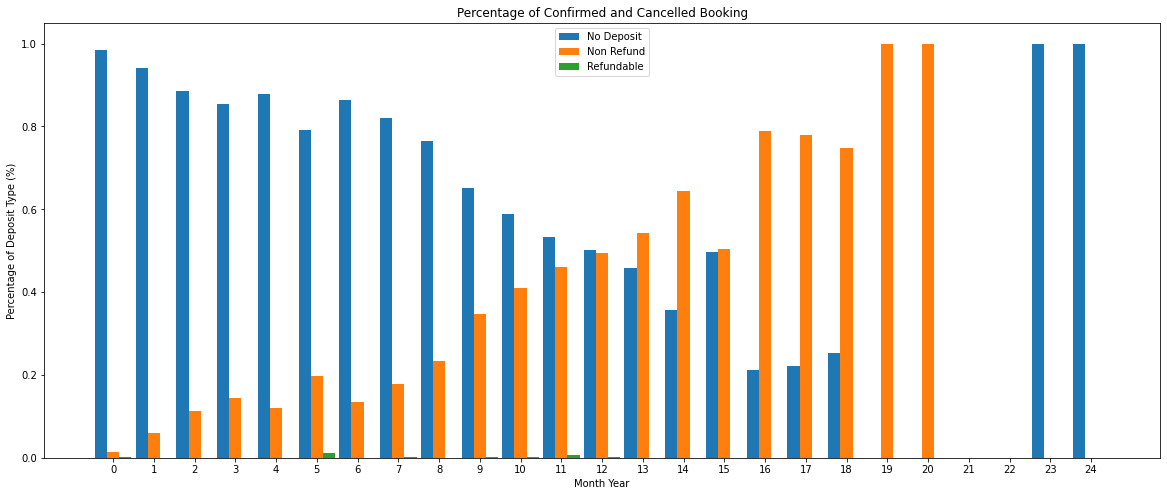

In [95]:
step2 = np.arange(0,25)

fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(lead_time_canceled.index - 0.3, lead_time_canceled_deposit['No Deposit'], width = 0.3)
ax.bar(lead_time_canceled.index, lead_time_canceled_deposit['Non Refund'], width = 0.3)
ax.bar(lead_time_canceled.index + 0.3, lead_time_canceled_deposit['Refundable'], width = 0.3)

ax.set_xticks(step2)
# ax.set_xticklabels(lead_time_canceled_deposit.index, rotation = 90)
plt.legend(['No Deposit', 'Non Refund', 'Refundable'])
plt.xlabel('Month Year')
plt.ylabel ('Percentage of Deposit Type (%)')
plt.title('Percentage of Confirmed and Cancelled Booking')

For longer advance reservations (13 months and above) there are generally more non refundable deposit type compared
no deposit type. This will protect hotel from cancellation from long advance reservation.

Suggestion: More non refund deposit policy should be implemented for longer booking period more than 7 months in advance
since from our analysis booking that's more than 7 months in advances are more likely to be cancelled. Hotel could implement (no refund rates for cheaper price). Many hotels / TA used that technique to prevent from longer advance reservation cancellation.

#### Booking Location & Cancellation

In [96]:
booking_location =  pd.crosstab(df['booking_location'], df['is_canceled'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=booking_location.index, y=booking_location[0]),
    go.Bar(name='Cancelled Booking', x=booking_location.index, y=booking_location[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Confirmed Booking and Cancelled Booking for each booking location',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Booking Location',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()

More than half of the booking that's made within Portugal are cancelled. Booking that's made within portugal are almost 2.5 X more likely to be cancelled compared to booking that's made outside portugal.

#### Why Does Local Booking are way more likely to be canceled compared to the international booking

first we want to look at the deposit type and the effect of cancellation and how deposit type affect cancellation rate of both booking location

In [97]:
booking_location_cancelled =  pd.crosstab(df['booking_location'],df['is_previously_cancelled'],normalize= 'index')

fig = go.Figure(data=[
    go.Bar(name='Previously Not Cancelled', x=booking_location_cancelled.index, y=booking_location_cancelled[0]),
    go.Bar(name='Previously  Cancelled', x=booking_location_cancelled.index, y=booking_location_cancelled[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Previously Cancellation',
                 yaxis=dict(
                 title='Percentage of previous booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Booking Location',
                 titlefont_size=16,
                 tickfont_size=14,))
fig.show()

Our first analysis why local booking has higher cancellation rate compared to international booking is because 
the higher previously cancelled booking rate in the local booking.

From our analysis that 92% of booking that's previously cancelled will be cancelled again 
this might have an effect why local booking has higher cancellation rate compared to international booking.

In [98]:
booking_location_deposit = pd.crosstab(df['booking_location'],df['deposit_type'],normalize= 'index')

fig = go.Figure(data=[
    go.Bar(name='No Deposit', x=booking_location_deposit.index, y=booking_location_deposit['No Deposit']),
    go.Bar(name='Non Refund', x=booking_location_deposit.index, y=booking_location_deposit['Non Refund']),
    go.Bar(name='Refundable', x=booking_location_deposit.index, y=booking_location_deposit['Refundable'])])


fig.update_layout(barmode='group', title = 'Percentage of Deposit for each booking location',
                 yaxis=dict(
                 title='Percentage of Deposit Type (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Booking Location',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()

Second reason is why local booking has more cancellation compared to international booking is because 
there are more non refunable deposit booking for local booking compared to international booking.

From our past analysis we see that 99% of Non refund booking were cancelled this might be the second reason why 
local booking has more cancellation compared to international booking.

Almost all international booking are made without deposit 99.2 %

In [99]:
deposit_cancellation = pd.crosstab(df['deposit_type'],df['is_canceled'],normalize= 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=deposit_cancellation.index, y=deposit_cancellation[0]),
    go.Bar(name='Canceled Booking', x=deposit_cancellation.index, y=deposit_cancellation[1])])


fig.update_layout(barmode='group', title = 'Percentage of Cancellation for each Deposit Type',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Deposit Type',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()

We see that almost every non refund booking are most likely to be cancelled compared to other deposit type.

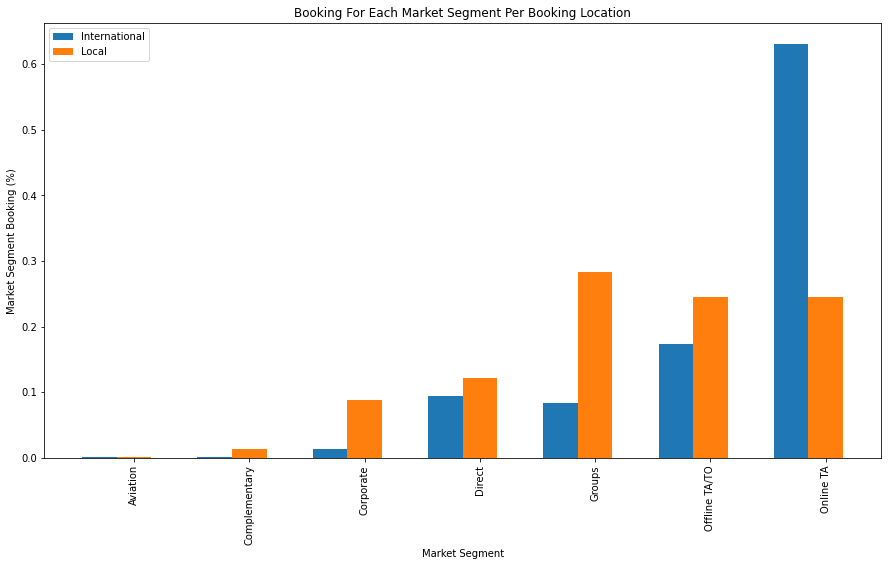

In [100]:
location_segment =  pd.crosstab(df['market_segment'], df['booking_location'], normalize = 'columns')
location_segment_step = np.arange(0,7)
location_segment


fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(location_segment_step - 0.3, location_segment['International'], width = 0.3)
ax.bar(location_segment_step, location_segment['Local'], width = 0.3)
# ax.bar(lead_time_canceled.index + 0.3, lead_time_canceled_deposit['Refundable'], width = 0.3)

ax.set_xticks(location_segment_step)
ax.set_xticklabels(location_segment.index, rotation = 90)
# plt.legend(['No Deposit', 'Non Refund', 'Refundable'])
plt.xlabel('Market Segment')
plt.ylabel ('Market Segment Booking (%)')
plt.legend(['International', 'Local'])
plt.title('Booking For Each Market Segment Per Booking Location')

plt.show()

Looking at the chart, we see that for International Booking it is mainly Dominated By OTA (Online Travel Agent).

For the local booking, the booking market segment are kind of spread out with the highest percentage belong to group booking. 

As we know from our past analysis, Group Booking is the only market segment that has the higher cancelation rate compared
to it's confirmed rate 61 % Cancelation Rate.

This is one of the reason why local booking have a higher cancellation rate compared to international booking 

#### Number of Adults , Guest & Cancellation

In [101]:
adults_cancellation =  pd.crosstab(df['adults'], df['is_canceled'], normalize = 'index')


fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=adults_cancellation.index, y=adults_cancellation[0], marker_color = 'forestgreen'),
    go.Bar(name='Cancelled Booking', x=adults_cancellation.index, y=adults_cancellation[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Cancellation Per Number of Adults',
                 yaxis=dict(
                 title='Cancellation Rate (%) / Each Numbers of Adults',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Number of Adults',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()

We see that there are no confirmed booking for booking with more than 4 adults.

Suggestion : Hotel should limit the number of adults for each booking. since there are no confirmed booking with more than 4 adults, hotel could resell (overbooking) the room that has more than 4 adults in the booking since hotel know they all will be cancelled.

In [102]:
guest_cancellation = pd.crosstab(df['guests'], df['is_canceled'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=guest_cancellation.index, y=guest_cancellation[0], marker_color = 'forestgreen'),
    go.Bar(name='Cancelled Booking', x=guest_cancellation.index, y=guest_cancellation[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Cancellation Per Number of guest',
                 yaxis=dict(
                 title='Cancellation Rate (%) / Each Numbers of guest',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Number of guest',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()

For number of guest there's a slight difference with number of adults in term of cancellation. Majority of booking with more than 5 guest in a single booking are likely to be cancelled.

However there are a few of confirmed booking with total guest of 10 and 12.
Booking with more than 12 of total guest are 100% cancelled.

#### Market Segment & Cancellation

In [103]:
market_cancellation = pd.crosstab(df['market_segment'], df['is_canceled'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=market_cancellation.index, y=market_cancellation[0]),
    go.Bar(name='Cancelled Booking', x=market_cancellation.index, y=market_cancellation[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Booking Per Market Segment',
                 yaxis=dict(
                 title='Percentage of booking (%) / Market Segment',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Market Segment',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()


We can see pattern here for Aviation booking, Complementary, Corporate, and Direct cancellation. Rate ranges from 12 - 22 %
while booking from Travel agent market segment (online / offline) on average has 34 - 37 % cancellation. The booking from Group which has cancellation rate of 61 %, group booking has the highest cancellation among all market segment.

Direct booking has the lowest cancellation rate among all market segment, hotel should have program to encourage 
people to book through direct booking (easy access of direct booking, multiple payment system, loyalty card, credit card bundle deals).

In [104]:
### Deposit Type For each Market Segment

market_deposit = pd.crosstab(df['market_segment'], df['deposit_type'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='No Deposit', x=market_deposit.index, y=market_deposit['No Deposit']),
    go.Bar(name='Non Refund', x=market_deposit.index, y=market_deposit['Non Refund']),
    go.Bar(name='Refundable', x=market_deposit.index, y=market_deposit['Refundable'])])


fig.update_layout(barmode='group', title = 'Percentage of Deposit Type for each Market Segment',
                 yaxis=dict(
                 title='Percentage of Deposit Type (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Market Segment',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()


#### Repeated Guest & Cancellation

In [105]:
repeated_cancelled = pd.crosstab(df['is_repeated_guest'], df['is_canceled'], normalize = 'index')


fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=['Non Repeated Booking', 'Repeated Booking'], y=repeated_cancelled[0]),
    go.Bar(name='Cancelled Booking', x=['Non Repeated Booking', 'Repeated Booking'], y=repeated_cancelled[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Confirmed Booking and Cancelled Booking for Repeat & Non Repeat',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Booking Types',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()

Customer who has a repeated booking (existing customers) are less likely to cancel their booking compared to new customers.

Non repeated booking are more than twice more likely to be cancelled compared to repeated booking. 

Suggestion: Hotels should focus more on re attract existing customers becase as we can see that repeated booking are less likely to be cancelled compared to non repeated booking 

In [106]:
## where does all repeated guest comes from 

repeated_distribution =  pd.crosstab(df['distribution_channel'], df['is_repeated_guest'], normalize = 'index')
repeated_distribution

fig = go.Figure(data=[
    go.Bar(name='Non Repeated Booking', x=repeated_distribution.index, y=repeated_distribution[0]),
    go.Bar(name='Repeated Booking', x=repeated_distribution.index, y=repeated_distribution[1])])


fig.update_layout(barmode='group', title = 'Percentage of Cancellation per Distribution Channel',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Distribution Channel',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()

We can see  the majority of the booking from all the market segment are non repeated booking(new customers)
however we see that Corporate has the higest rate of repeated booking at (23. 5 %) that's almost a quarter means 
almost 1 / 4 corporate booking is a repeated booking.

We can say that business traveler in this case is corporate booking are more likely to retain compared to leisure booking
(we are assuming that other than corporate booking is leisure traveler)

#### Previously Cancellation & Cancellation 


How does the pattern of booking that's previosly cancelled towards the future booking compared to booking that's never been cancelled before 

In [107]:
previously_cancelled =pd.crosstab(df['is_previously_cancelled'], df['is_canceled'], normalize = 'index')


fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=previously_cancelled.index, y=previously_cancelled[0]),
    go.Bar(name='Cancelled Booking', x=previously_cancelled.index, y=previously_cancelled[1])])


fig.update_layout(barmode='group', title = 'Percentage of Previously Cancelled Booking',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Previously Cancelled',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()

We see that almost 92% of booking that has been cancelled will be cancelled again.

Suggestion : All cancelled booking before should be on non refund deposit on the future booking because 
we see that 92 % of past cancelled booking will cancel again by leveraging the policy we will be able to protect the hotel
from losing revenue. 

#### Parking Space & Cancellation

In [108]:
parking_cancel = pd.crosstab(df['parking_space'], df['is_canceled'], normalize = 'index')
parking_cancel

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=parking_cancel.index, y=parking_cancel[0]),
    go.Bar(name='Cancelled Booking', x=parking_cancel.index, y=parking_cancel[1])])


fig.update_layout(barmode='group', title = 'Parking Space And Cancelled Booking',
                 yaxis=dict(
                 title='Percentage of Booking / Cancelled Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Required Parking Space',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()

We see that booking who require a parking space never been cancelled based on the hotel booking database. There are around 6 % of booking that require a car parking space. 


The hotel could promote anything that makes people who vehicle life easier, eg(free valet, free charging for electric car, and etc) since there're no cancellation for people who drives to the hotel attracting more of them is not a bad idea at all.

Since the exploratory data analysis has been carried out, we will export this data and go for the Model Development using Machine Learning Algorithms by reloading the exported data so that this data can be re-used.

In [109]:
df.to_csv('hotel_final.csv' ,index= False)

## Conclusions and Recommendations

### Conclusion :


#### 1. Market Segment & Booking Cancellation 

- *How does Market Segment of a booking affecting cancellation ?*

    - from our analysis we see that **corporate** , **Direct**, and **Aviation** has a cancellation rate around **18 - 22 %** of their booking
    - **Travel Agent (Online / Offline)** has a cancellation rate around **34 - 36 %**
    - Lastly **Group** has the highest cancellation rate around **61 %**

Based on this we conclude that **group booking are the market segment that's most likely to be canceled** compared to other market segment while **Direct has the lowest cancellation rate at 15%**  *(Outside Complimentary)*


#### 2. Lead Time & Cancellation Rate
- *How does a Lead time of a booking **(arrival date - booking date) total days** affecting cancellation rate* 

    - in this case we group the lead time into monthly *(30 days month)* lead time to make it more general to analyze compared to a specific number of days 
    
For Lead time and cancellation rate we're comparing each monthly lead time confirmed booking & canceled rate. **Booking That has 0 - 7 months lead time** have a higher confirmed booking rate **( > 50%)** to it's canceled rate.


For **Booking that has more than 7 months lead time** have a higher cancelation rate **( > 50%)** to it's confirmed rate. Based on this pattern of lead time and cancellation we conclude that.

- booking that has **more than 7 months of lead time are more likely to be canceled** than confirmed
- **cancellation is positively correlated with lead time** *(the higher the lead time the higher the cancellation rate)*
- the shorter the lead time the **less likely the booking will be canceled**


#### 3. Deposit Type & Cancellation Rate
- *How does a different Deposit type affecting booking cancellation*

    - This Dataset has 3 kinds of deposit type **NO Deposit, NO Refund, and Refundable**, all of the name is kind of self explanatory, based on our analysis we found out that:
    
- **No Refund Booking has the highest cancellation rate at 99.4%**
- **No Deposit has cancellation rate of 28.3 %**
- **While Refundable has cancellation rate around 22%**

For the hotels this is nothing alarming since they don't lose revenue when  no refund booking is canceled, but it's always a good practice to question something is extraordinary,  **why does non refundable booking are most likely to be canceled?** Isn't just like wasting money cancelling your non refundable booking. To answer that question let's look at the median lead time of each deposit type


##### 3.1 Deposit Type & Lead Time

   - previously we found out that the longer lead time he more likely the booking will be canceled, the median lead time of each deposit type:
   
 - **Median Lead Time Non Refund 183 Days**
 - **Median Lead Time Refundable 169 Days**
 - **Median Lead Time No Deposit 56 Days**
 
 Looking at the median lead time it shows that **No Refund Deposit** booking has the highest median lead time compared to the other booking and based on our analysis on lead time and cancellation it shows that higher lead time are more prone to cancellation compared to the short one this is definitely one of the reason why cancellation rate is high in **No Refund Deposit**


#### 4.Cancellation & Booking Location 
-  How does cancellation rate of **booking that's made from Portugal** compared to the **booking that's made from outisde Portugal *(International)***

For booking location in this dataset we originally have **177 countries *(including Portugal)***, it's not efficient and not effective to aggregating every country with portugal in this one we split the **booking location into 2 Local (Booking that is from Portugal) and International (Booking Outside Portugal)**

- International Booking have **24% cancellation Rate** while Local Booking have **56% cancellation Rate**

**This arise question why does local booking are more likely to be canceled compared to international booking ?**

##### 4.1 Booking Location & Previously Cancellation
- comparison of previously canceled booking from 2 different booking location
    - From the Analysis **booking that's previously canceled have 92% cancellation rate**
    

For **International Booking 99.5%** of the booking were never canceled before comparison to the **local booking that only 87 %** booking that's never been canceled before. This definitely plays a factor why **Local Booking** has a higher cancellation rate compared to **International Booking** 


#### 5. Factors That Affecting Cancellation

- Aside from the "common cancellation variable" this dataset provide some other information that might have information about cancellation


##### 5.1 Repeated Guests & Cancellation

In this dataset we only have around **3%** of repeated guest, though we still see the difference of cancellation pattern in both repeated guest and non repeated guest 

- **Repeated Guest has cancellation rate around 14%**
- **Non Repeated Guest are more than 2X more likely to cancelled the booking compared to repeated guest**

 
*in conclusion:*

**Repeated Guest are more likely to confirm their booking compared to non repeated guest** 


##### 5.2 Previous Cancellation & Cancellation


- **Booking that's previouly canceled have 92%  cancellation rate**
- **Booking that's originally wasn't canceled has 34% Cancellation rate**


**This shows that booking that's previously canceled will likely to be canceled again in the future**


##### 5.3 Parking Space & Cancellation 

This is one of the not common metrics to look at when it comes to predictiing cancellation and analyzing cancellation, however in this data set there are around **7407 (6.2 %)** that required car parking space(s).


Out of **7407 Bookings** that require a parking space **there is not a single booking that's canceled (0 Cancellation).**

**This concludes that booking that required a parking space will high likely to be confirmed.** 



##### 5.4 Booking Changes & cancellation

- Customer Who made booking Changes to their booking have a lower cancellation rate **(16%)** compared to the custoamers who never made booking changes to their booking **(41%)**.


##### 5.5 Special Request & Cancellation 

The number of special request(s) in a booking apperently affecting the cancellation rate of a booking. From our analysis we see that booking that has no special request are more likely to canceled compared to booking that has a special request. 

- **The cancellation rate of booking that has a special request is ranging from 5 - 22 %. With booking with 5 special requests has the lowest cancellation rate** 

- **While Booking with no special request has cancellation rate of 48%**



### Recommendation


#### Only Non Refundable Deposit For  Group Booking 

- From the analysis we see that group booking has the highest cancellation rate among all market segment. Only allowing *Non refundable deposit* for group booking will help protect the hotel from losing revenue due to last minute cancellation and not able to find replacement. **Only Allowing Non Refundable Rates might result in fewer bookings for Group**, however it might protect the hotel from losing revenue. 

#### Setting Maximum Lead Time for Booking

- We see a pattern that booking that has more than **210 days of lead time** are more likely to be canceled, setting up maximum lead time means it won't be able to make booking that's too far in advance (**> 210 days**), and setting maximum advance reservation will help you to reduce cancellation


#### Combination of Restriction 

- As we know that booking that's made **210 days in advance** are more likely to result in cancellation. However setting up a maximum lead time for booking might have resulted visibility of the hotel in potential guest search. Combining deposit type policy with with the restriction might help the hotel get more exposure without higher risk of cancellation **(eg. Non Refundable Deposit for booking that's more than 210 days in advance**) or taking an partial advance payment for booking that's over **210 days**


#### Additional Resource / Research For Local Customers 


- **56% of booking that's made in the Portugal are cancelled.** This is hotel responsibility to research why does the local market are more likely to cancel compared to confirmed, and why does international customer are less likely to cancel. There are  intagible & tangible aspect in this research outside the PMS dataset, such as 
    1. **Comparison of hotel service satisfaction of local and international customers**
    
    
#### Increase Direct Booking Market Segment 

- From this dataset we see that direct booking has the least cancellation rate **15%** *(outside complimentary)* compared to other market segment, with only being 10% of total booking market segment having more booking from direct market segment will likely to reduce the number of cancellation. 

**Strategy to increase Direct Booking**
1. *Leverage the power of a well optimized website* 
     - Visually attractive website
     - Offer & Ensure Best Rate Guarantee
     - Multilanguage & multi currency features 
     
     
2. *Increase Hotel Online Reputation*
    - Almost 98% of travelers read hotel reviews and 80% of them consider them extremely important before making the final reservation. **A one-point increase** in a hotel’s average user rating on a 5-point scale (eg, 3.8 to 4.8) makes potential customers **13.5% more likely to book that hotel**
    
    
3. *Offer Loyalty program with difference*
    - Incentivizing your guest with loyalty programs to book directly at the hotel website, by giving them points that could easily be redeemed not only at the hotel but at also at certain POS outlets
    

 Source : <a href = "https://www.hotelspeak.com/2019/05/9-strategies-to-increase-hotel-direct-bookings/">Hotel Speak</a>
 
 Direct Booking Impact : <a href = "https://www.hotelogix.com/blog/2019/04/22/the-impact-of-direct-bookings-on-your-hotel/?utm_medium=referral&utm_source=hotelspeak&utm_campaign=hoteldirectbookingblog04">Impact of Direct Booking towards the hotel </a>
 
#### Stricter Cancellation For Previously Canceled Booking
 
- Booking that was previously canceled has **92% Cancellation Rate** looking at this pattern we know that booking that's **previously canceled are most likely to be canceled again**. To protect the hotel from losing revenue due to this pattern, hotel needs to **set booking payment in advance for booking that was canceled before**, this will help hotel preventing loss of revenue from last minute cancellation from this kind of booking.


#### Attracting Customer That Drive

- There are around **6% of total booking that required parking space (7407 bookings)** from July 2015 to August 2017, and out of 7407 **not a single one of the booking were canceled**, and that amount is **around 10% of confirmed booking**. Hotel could promote to attract customer that drives.



**Strategy to Attract More Customer Who Drives**

1. *Incetivize Customer Who Drives*
    - Free Valet Parking 
    - Free Charging for Electric Car
    - Free Parking
    
    
2. *Host The Launch of New Car*
    - Hosting a car event will more likely to bring customers who drives to the hotel, and we know that customers who drives never canceled their booking from this data.

# Machine Learning

In [110]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

Loading Analysed data

In [111]:
df = pd.read_csv('hotel_final.csv')

### Feature Selection for machine learning process

Label encoding for certain columns that needs to be encoded

In [112]:
df['booking_location_encoded'] =df['booking_location'].map({'International':1, 'Local':0})
df['hotel_encoded'] = df['hotel'].map({'City Hotel': 1, 'Resort Hotel':0})

Association checking using dython

In [113]:
!pip install dython
import dython
from dython.nominal import associations

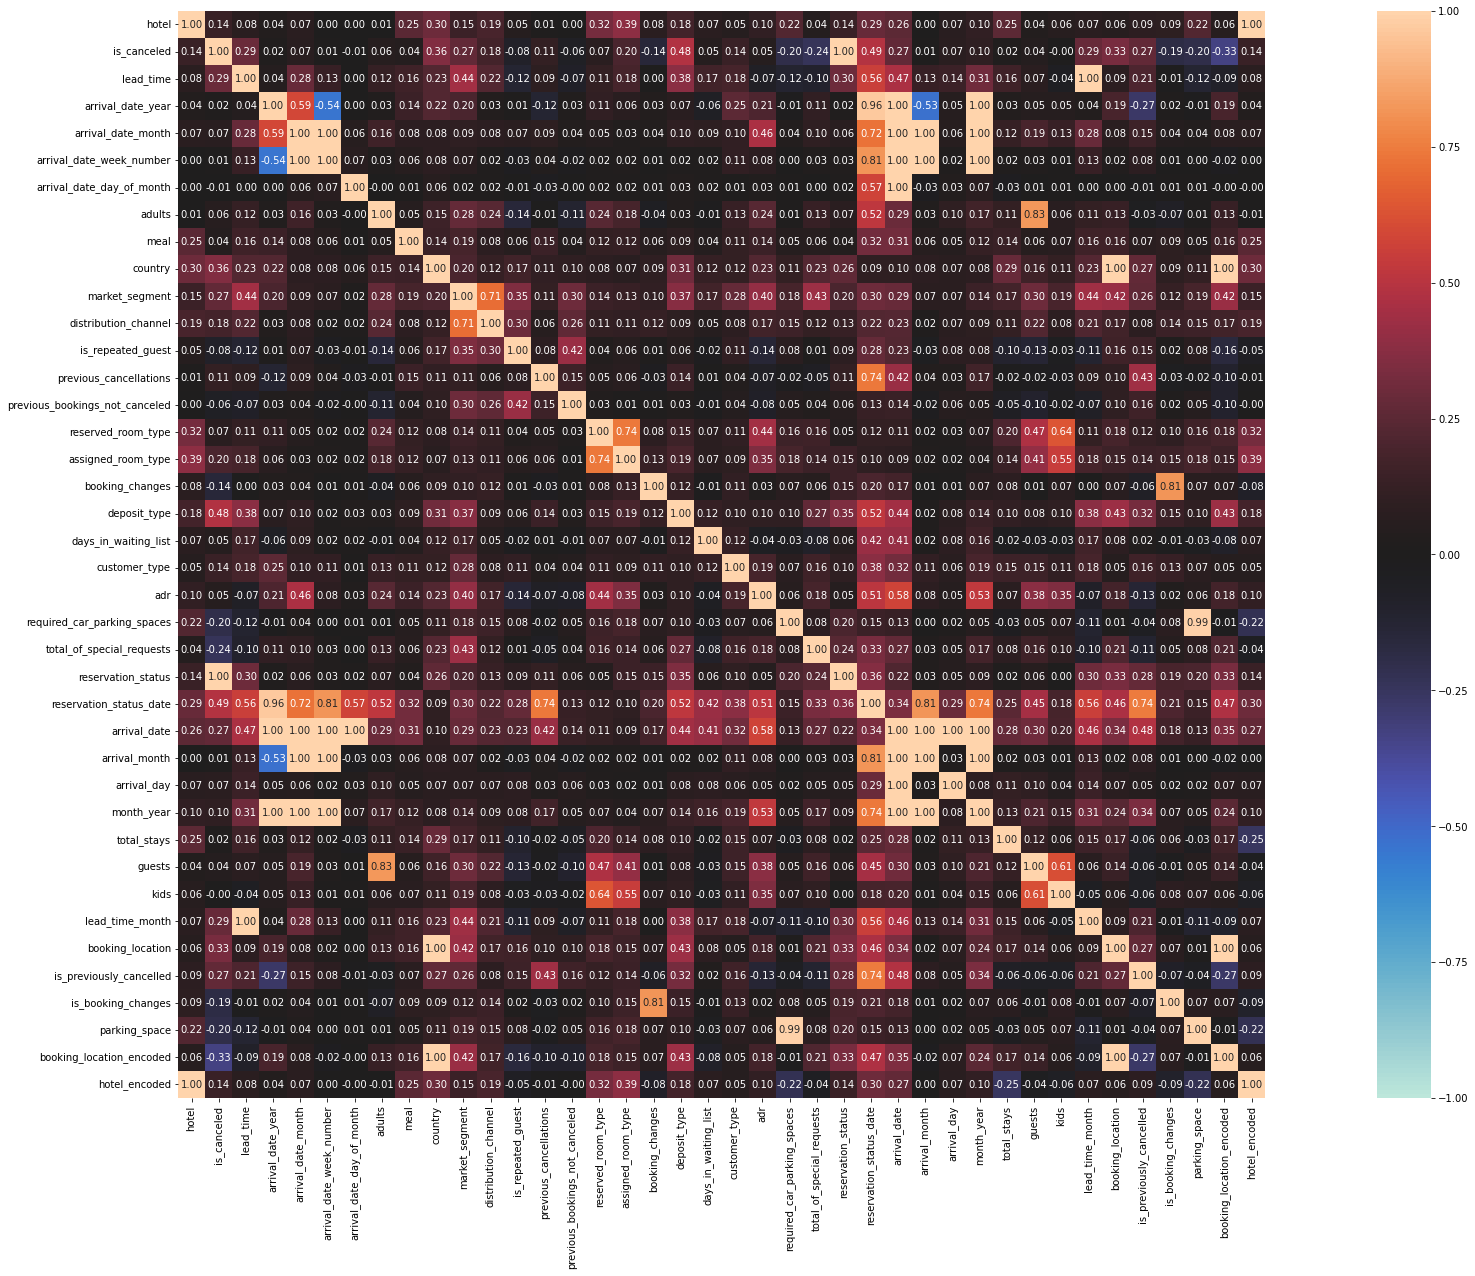

In [114]:
associations(df, figsize = (40, 20))
plt.show()

Reservation Status have 1.00 Association Value with the Target. Because of the reservation status will tell whether the booking has been canceled or not or checkout, using this column to build a model is prohibitted because you won't be able to predict future booking, since the future booking still doesn't have it status yet
    

We see that many features are highly correlated (having values >.70) and some are moderately correlattted( having values between .50 and .70).

Also our EDA shows that there are many features that does not have significant effect on booking cancellations.

So by dropping correlated and less significant features, we consider only significant features for the Machine Learning Models.

###### Also our EDA shows that there are many features that does not have significant effect on booking cancellations.

###### So by dropping correlated and less significant features, we consider only significant features for the Machine Learning Models. 

## Model Building

In [115]:
X = df[['hotel_encoded','booking_location_encoded','lead_time', 'market_segment', 'deposit_type', 'parking_space', 'total_of_special_requests', 'is_previously_cancelled', 'is_repeated_guest', 'is_booking_changes', 'customer_type', 'total_stays', 'guests']]
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [116]:
X.dtypes

hotel_encoded                  int64
booking_location_encoded       int64
lead_time                      int64
market_segment                object
deposit_type                  object
parking_space                  int64
total_of_special_requests      int64
is_previously_cancelled        int64
is_repeated_guest              int64
is_booking_changes             int64
customer_type                 object
total_stays                    int64
guests                       float64
dtype: object

In [117]:
cat_columns = ['market_segment','deposit_type','customer_type']
num_columns = ['hotel_encoded','booking_location_encoded','lead_time', 'parking_space', 'total_of_special_requests', 'is_previously_cancelled', 'is_repeated_guest', 'is_booking_changes', 'total_stays', 'guests']

### Using pipeline for model building

Scaling for numerical features

Label Encoder for categorical features

In [118]:
# from sklearn.model_selection import train_test_split
# GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

In [119]:
# this is preparation of all the the pipeline model to predict ML algorithms.
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

prepocessor = ColumnTransformer([
    ('categorical',categorical_pipeline,cat_columns),
    ('numerical', numerical_pipeline,num_columns)
])

pipe_logreg = Pipeline([
    ("prep", prepocessor),
    ("algo", LogisticRegression())
])

pipe_KNN = Pipeline([
    ('prep', prepocessor),
    ('algo', KNeighborsClassifier())
])


pipe_RF = Pipeline([
    ("prep", prepocessor),
    ("algo", RandomForestClassifier())
])

pipe_DT = Pipeline([
    ("prep", prepocessor),
    ("algo", DecisionTreeClassifier())
])

### Logistic Regression

In [120]:
pipe_logreg.fit(X_train, y_train)
y_pred_logreg =  pipe_logreg.predict(X_test)
y_pred_logreg_train = pipe_logreg.predict(X_train)

In [121]:
recall_logreg = recall_score(y_test, y_pred_logreg)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
acc_logreg_train = accuracy_score(y_train, y_pred_logreg_train)

print(f"Training Accuracy : {acc_logreg_train}")
print(f"Testing Accuracy : {acc_logreg}")

Training Accuracy : 0.8024120687481615
Testing Accuracy : 0.8041349749968484


We see here that the model is not over fitted or underfitted using logistic regression model.

In [122]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85     14974
           1       0.81      0.62      0.70      8823

    accuracy                           0.80     23797
   macro avg       0.81      0.77      0.78     23797
weighted avg       0.80      0.80      0.80     23797



In [123]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg, labels = [1,0])
df_logreg = pd.DataFrame(data = cm_logreg, index = ['actual 1', 'actual 0'], columns = ['Predicted 1', 'Predicted 0'])
df_logreg

Predicted 1  Predicted 0
actual 1         5428         3395
actual 0         1266        13708

<AxesSubplot:>

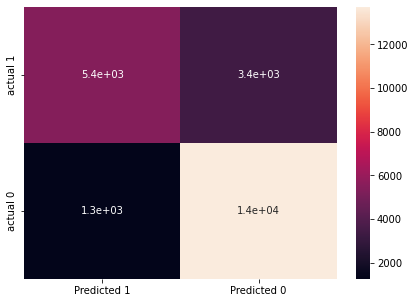

In [124]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_logreg, annot = True)

We see that using logistic regression we have around 1200 ++ false positive in this case (not cancelled booking) thats predicted to be cancelled and we have around 3300 ++ False Negative means (cancelled booking that's considered not cancelled)

### KNN

In [125]:
pipe_KNN.fit(X_train, y_train)
y_pred_KNN =  pipe_KNN.predict(X_test)
y_pred_KNN_train = pipe_KNN.predict(X_train)

In [126]:
recall_KNN = recall_score(y_test, y_pred_KNN)
acc_KNN = accuracy_score(y_test, y_pred_KNN)
precision_KNN = precision_score(y_test, y_pred_KNN)
f1_KNN = f1_score(y_test, y_pred_KNN)
acc_KNN_train = accuracy_score(y_train, y_pred_KNN_train)

print(f"Training Accuracy : {acc_KNN_train}")
print(f"Testing Accuracy : {acc_KNN}")

Training Accuracy : 0.8795856620582426
Testing Accuracy : 0.8354414421985965


We see that KNN has a better accuracy score compared to logistic Regression.

In [127]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     14974
           1       0.80      0.74      0.77      8823

    accuracy                           0.84     23797
   macro avg       0.83      0.82      0.82     23797
weighted avg       0.83      0.84      0.83     23797



In [128]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN, labels = [1,0])
df_KNN = pd.DataFrame(data = cm_KNN, index = ['actual 1', 'actual 0'], columns = ['Predicted 1', 'Predicted 0'])
df_KNN

Predicted 1  Predicted 0
actual 1         6537         2286
actual 0         1630        13344

<AxesSubplot:>

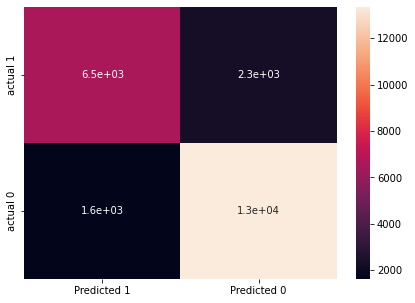

In [129]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_KNN, annot = True)

Compared to logistic regression, KNN model has a lower False negative (not cancelled prediction actual canceled)
however it has a higher False Positive (prediction cancelled actual not cancelled)

### Decision Tree Classifier

In [130]:
pipe_DT.fit(X_train, y_train)
y_pred_DT =  pipe_DT.predict(X_test)
y_pred_DT_train = pipe_DT.predict(X_train)

In [131]:
recall_DT = recall_score(y_test, y_pred_DT)
acc_DT = accuracy_score(y_test, y_pred_DT)
precision_DT = precision_score(y_test, y_pred_DT)
f1_DT = f1_score(y_test, y_pred_DT)
acc_DT_train = accuracy_score(y_train, y_pred_DT_train)

print(f"Training Accuracy : {acc_DT_train}")
print(f"Testing Accuracy : {acc_DT}")

Training Accuracy : 0.9419779804176998
Testing Accuracy : 0.8318275412867168


We see that Decision Tree has a better accuracy score compared to KNN and logistic Regression.

In [132]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     14974
           1       0.79      0.75      0.77      8823

    accuracy                           0.83     23797
   macro avg       0.82      0.81      0.82     23797
weighted avg       0.83      0.83      0.83     23797



In [133]:
cm_DT = confusion_matrix(y_test, y_pred_DT, labels = [1,0])
df_DT = pd.DataFrame(data = cm_DT, index = ['actual 1', 'actual 0'], columns = ['Predicted 1', 'Predicted 0'])
df_DT

Predicted 1  Predicted 0
actual 1         6585         2238
actual 0         1764        13210

<AxesSubplot:>

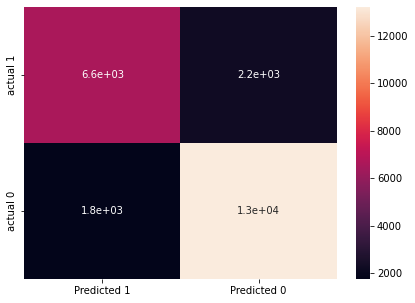

In [134]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_DT, annot = True)

Compared to Logistic Regression and KNN model, Decision tree has a lower False negative (not cancelled prediction actual canceled)
however it has a higher False Positive (prediction cancelled actual not cancelled)

### Random Forest

In [135]:
pipe_RF.fit(X_train, y_train)
y_pred_RF =  pipe_RF.predict(X_test)
y_pred_RF_train = pipe_RF.predict(X_train)

In [138]:
recall_RF= recall_score(y_test, y_pred_RF)
acc_RF = accuracy_score(y_test, y_pred_RF)
precision_RF = precision_score(y_test, y_pred_RF)
f1_RF = f1_score(y_test, y_pred_RF)
acc_RF_train = accuracy_score(y_train, y_pred_RF_train)

print(f"Training Accuracy : {acc_RF_train}")
print(f"Testing Accuracy : {acc_RF}")

Training Accuracy : 0.9419569693658865
Testing Accuracy : 0.8403580283228979


In [139]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     14974
           1       0.80      0.76      0.78      8823

    accuracy                           0.84     23797
   macro avg       0.83      0.82      0.83     23797
weighted avg       0.84      0.84      0.84     23797



In [140]:
cm_RF = confusion_matrix(y_test, y_pred_RF, labels = [1,0])
df_RF = pd.DataFrame(data = cm_RF, index = ['actual 1', 'actual 0'], columns = ['Predicted 1', 'Predicted 0'])
df_RF

Predicted 1  Predicted 0
actual 1         6729         2094
actual 0         1705        13269

<AxesSubplot:>

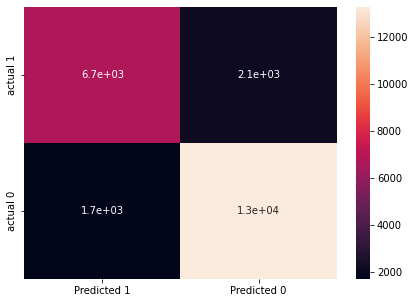

In [141]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_RF, annot = True)

Compared to Logistic Regression, KNN model and Decision tree, Random Forest has a lower False negative (not cancelled prediction actual canceled). 
However it has a higher False Positive (prediction cancelled actual not cancelled) than Logistic Regression and KNN but lower than Decision Tree.

### Evaluation Comparing Each Models Evaluation Matrix 

In [142]:
evaluation_matrix = {
    'Logistic Regression': [acc_logreg, recall_logreg, precision_logreg, f1_logreg],
    'KNN':[acc_KNN,recall_KNN,precision_KNN, f1_KNN],
    'Decision Tree':[acc_DT, recall_DT, precision_DT, f1_DT],
    'Random Forest':[acc_RF, recall_RF, precision_RF, f1_RF],
}

eva = pd.DataFrame(data = evaluation_matrix, index = ['Accucary', 'Recall', 'Precision', 'F1 Score'])
eva

Logistic Regression       KNN  Decision Tree  Random Forest
Accucary              0.804135  0.835441       0.831828       0.840358
Recall                0.615210  0.740904       0.746345       0.762666
Precision             0.810875  0.800416       0.788717       0.797842
F1 Score              0.699620  0.769511       0.766946       0.779857

In [143]:
evaluation_matrix_training = {
    "training" : [acc_logreg_train, acc_KNN_train, acc_DT_train, acc_RF_train],
    "testing": [acc_logreg, acc_KNN, acc_DT, acc_RF]
}
    

eva_train = pd.DataFrame(data = evaluation_matrix_training, index = ['Logreg', 'KNN', 'Decision Tree', 'Random Forest'])
eva_train

training   testing
Logreg         0.802412  0.804135
KNN            0.879586  0.835441
Decision Tree  0.941978  0.831828
Random Forest  0.941957  0.840358

We see from the evaluation matrix that Decision Tree and Random Forest has the highest score in training, while Random Forest has slightly higher score in testing than Decision Tree.

But also we can see that Logistic Regression has almost same accuracy for test and train data. So we may prefer that one also for making predictions.

### Prediction

In [144]:
# Prediction using Logistic Regression
data_timi = {
    "nama" : "Timi",
    "Sex" : "female",
    "Age" : 20,
    "hotel_encoded" : 1,
    "booking_location_encoded" : 1,
    "lead_time" : 108,
    "market_segment" : "Direct",
    'deposit_type': 'No Deposit',
    'parking_space':0,
    'total_of_special_requests':0,
    'is_previously_cancelled':1,
    'is_repeated_guest':1,
    'is_booking_changes':1,
    'customer_type':'Transient',
    'total_stays': 2,
    'guests': 2.0,
    "Email" : "sakkuraani567@gmail.com"
}

timi = pd.DataFrame(data = data_timi, index = [1])
pipe_logreg.predict_proba(timi)

array([[0.74987476, 0.25012524]])

In [145]:
# Prediction using Random Forest
data_timi = {
    "nama" : "Timi",
    "Sex" : "female",
    "Age" : 20,
    "hotel_encoded" : 1,
    "booking_location_encoded" : 1,
    "lead_time" : 108,
    "market_segment" : "Direct",
    'deposit_type': 'No Deposit',
    'parking_space':0,
    'total_of_special_requests':0,
    'is_previously_cancelled':1,
    'is_repeated_guest':1,
    'is_booking_changes':1,
    'customer_type':'Transient',
    'total_stays': 2,
    'guests': 2.0,
    "Email" : "sakkuraani567@gmail.com"
}

timi = pd.DataFrame(data = data_timi, index = [1])
pipe_RF.predict_proba(timi)

array([[0.575, 0.425]])

We see that our model could predict new data that's outside the training and testing set 
we used Logistic Regression and RandomForestClassifier and predict in this case, we that Timi is 74% will likely to confirmed booking according to Log Reg while 70% will likely to confirmed booking according to Random Forest.

### Conclusion, Limitation & Improvement (Future Research)

#### Conclusion

- **Random Forest Has The Best Accuracy Among All Algorithm That We Tried**
    - From all the evaluation matrix to predict hotel cancellation classification case, we see that  **Random Forest** has the best accuracy when it comes to predicting hotel cancellation based on certain features **(83.2 %)**


- **Reservation Status Column**
    - Reservation Status have 1.00 Association Value with the Target, because of the reservation status will tell whether the booking has been canceled, no show or checkout, using this column to build a model is prohibitted because you won't be able to predict future booking, since the future booking still doesn't have it status yet.

- **Using Accuracy As The Primary Evaluation Metrics**

    1. The First Reason Why Accuracy is used as the evaluation metric here because we have somehow a balance data **63 % Confirmed Booking** and **37% Canceled Booking** in this case our dataset is balance and hence using accuracy is acceptable in this case. 
    2. In this case **every class is equally important** 
    
    
- **How This Model Will Help Hotels ?**

    - This model will allow hotel managers / revenue manager to take actions on bookings that's identified as "potentially going to be canceled". **Furthermore the development of these model should contribute to hotel revenue management.**
    - **These prediction models enable hotel managers to mitigate revenue loss derived from booking cancellations and to mitigate the risks associated with overbookings (reallocation costs, cash or service compensations, and particularly important today, social reputation costs)**. Booking cancellations model also allows hotel managers to **implement less rigid cancellation policies, without increasing uncertainty**. This has the potential to translate into more sales, since less rigid cancellation policies generate more bookings.